In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# 환경준비
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as spst # 통계 분석 기능을 간편하게 사용하기 위한 라이브러리

import warnings
warnings.filterwarnings(action='ignore')

%config InlineBackend.figure_format = 'retina'
plt.rcParams['figure.figsize'] = (6, 4)

 # **이변량 분석 ① - 수치형 → 수치형**

In [6]:
# 데이터 읽어오기
path = '/content/drive/MyDrive/DataForSudy/airquality2.csv'
air = pd.read_csv(path)

# 확인
air.head()

,Ozone,Solar.R,Wind,Temp,Date
0,41,190.0,7.4,67,1973-05-01
1,36,118.0,8.0,72,1973-05-02
2,12,149.0,12.6,74,1973-05-03
3,18,313.0,11.5,62,1973-05-04
4,19,NaN,14.3,56,1973-05-05


In [7]:
# 데이터 읽어오기
path = '/content/drive/MyDrive/DataForSudy/insurance.csv'
insurance = pd.read_csv(path)

# 확인
insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


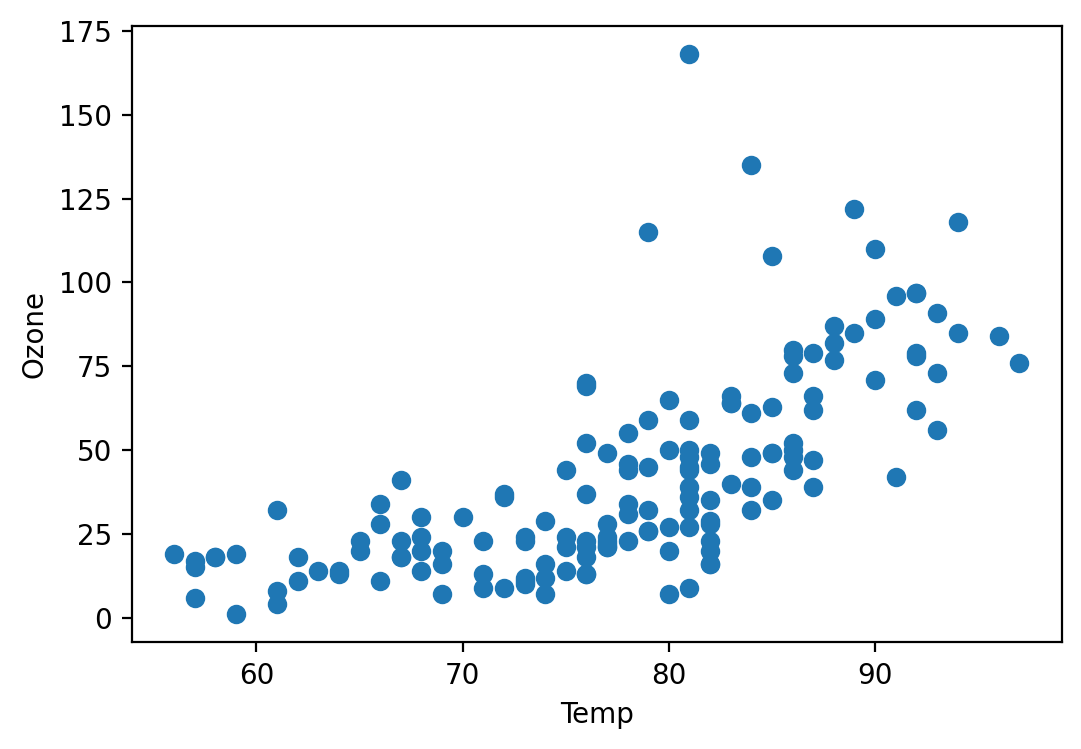

In [9]:
# 산점도
plt.scatter(x='Temp', y='Ozone', data=air)
plt.xlabel('Temp')
plt.ylabel('Ozone')
plt.show()

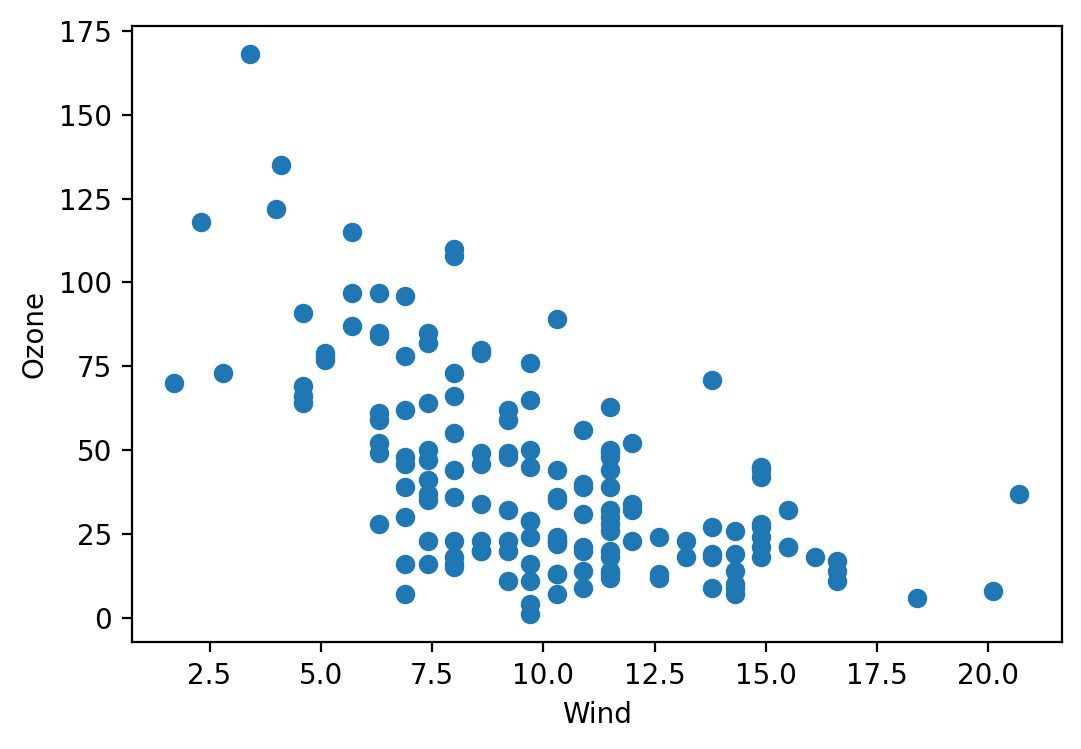

In [10]:
plt.scatter(x='Wind', y='Ozone', data=air)
plt.xlabel('Wind')
plt.ylabel('Ozone')
plt.show()

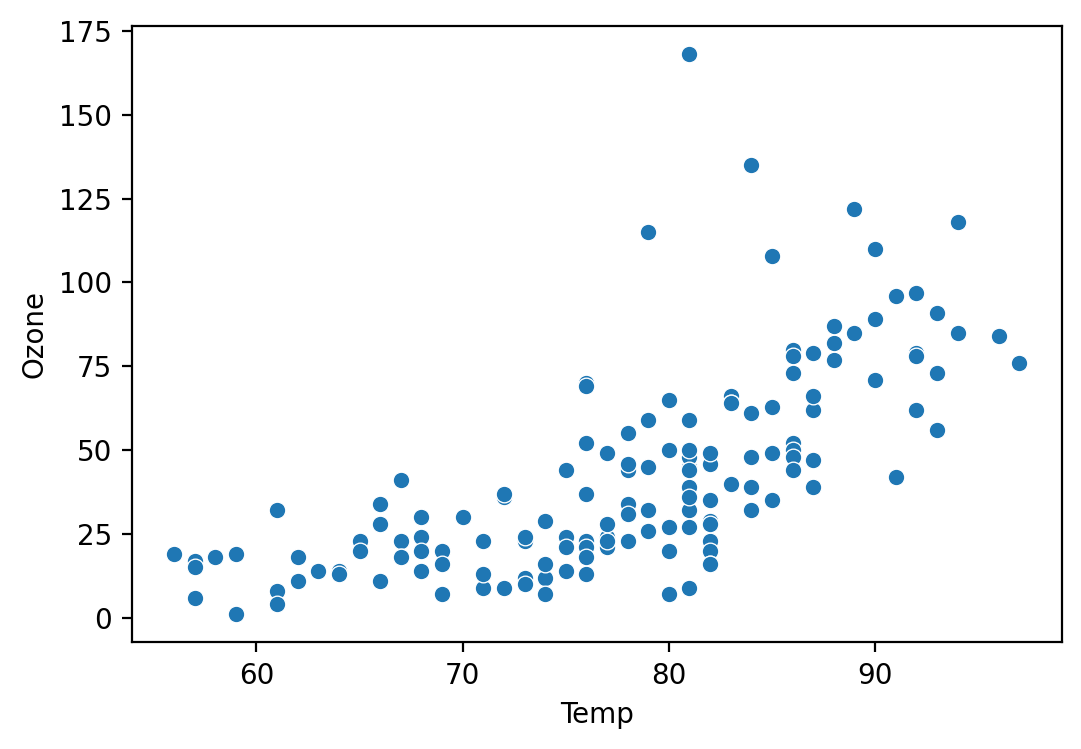

In [11]:
sns.scatterplot(x='Temp', y='Ozone', data=air)
plt.show()

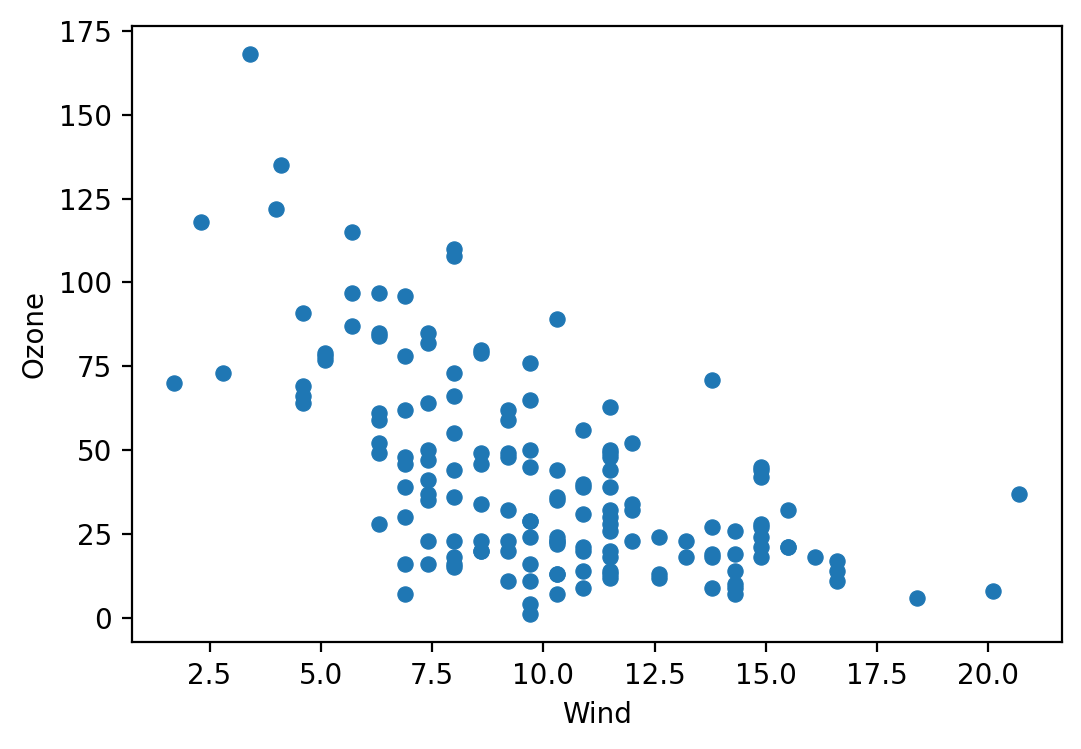

In [12]:
sns.scatterplot(x='Wind', y='Ozone', data=air, s=30, ec=None)
plt.show()

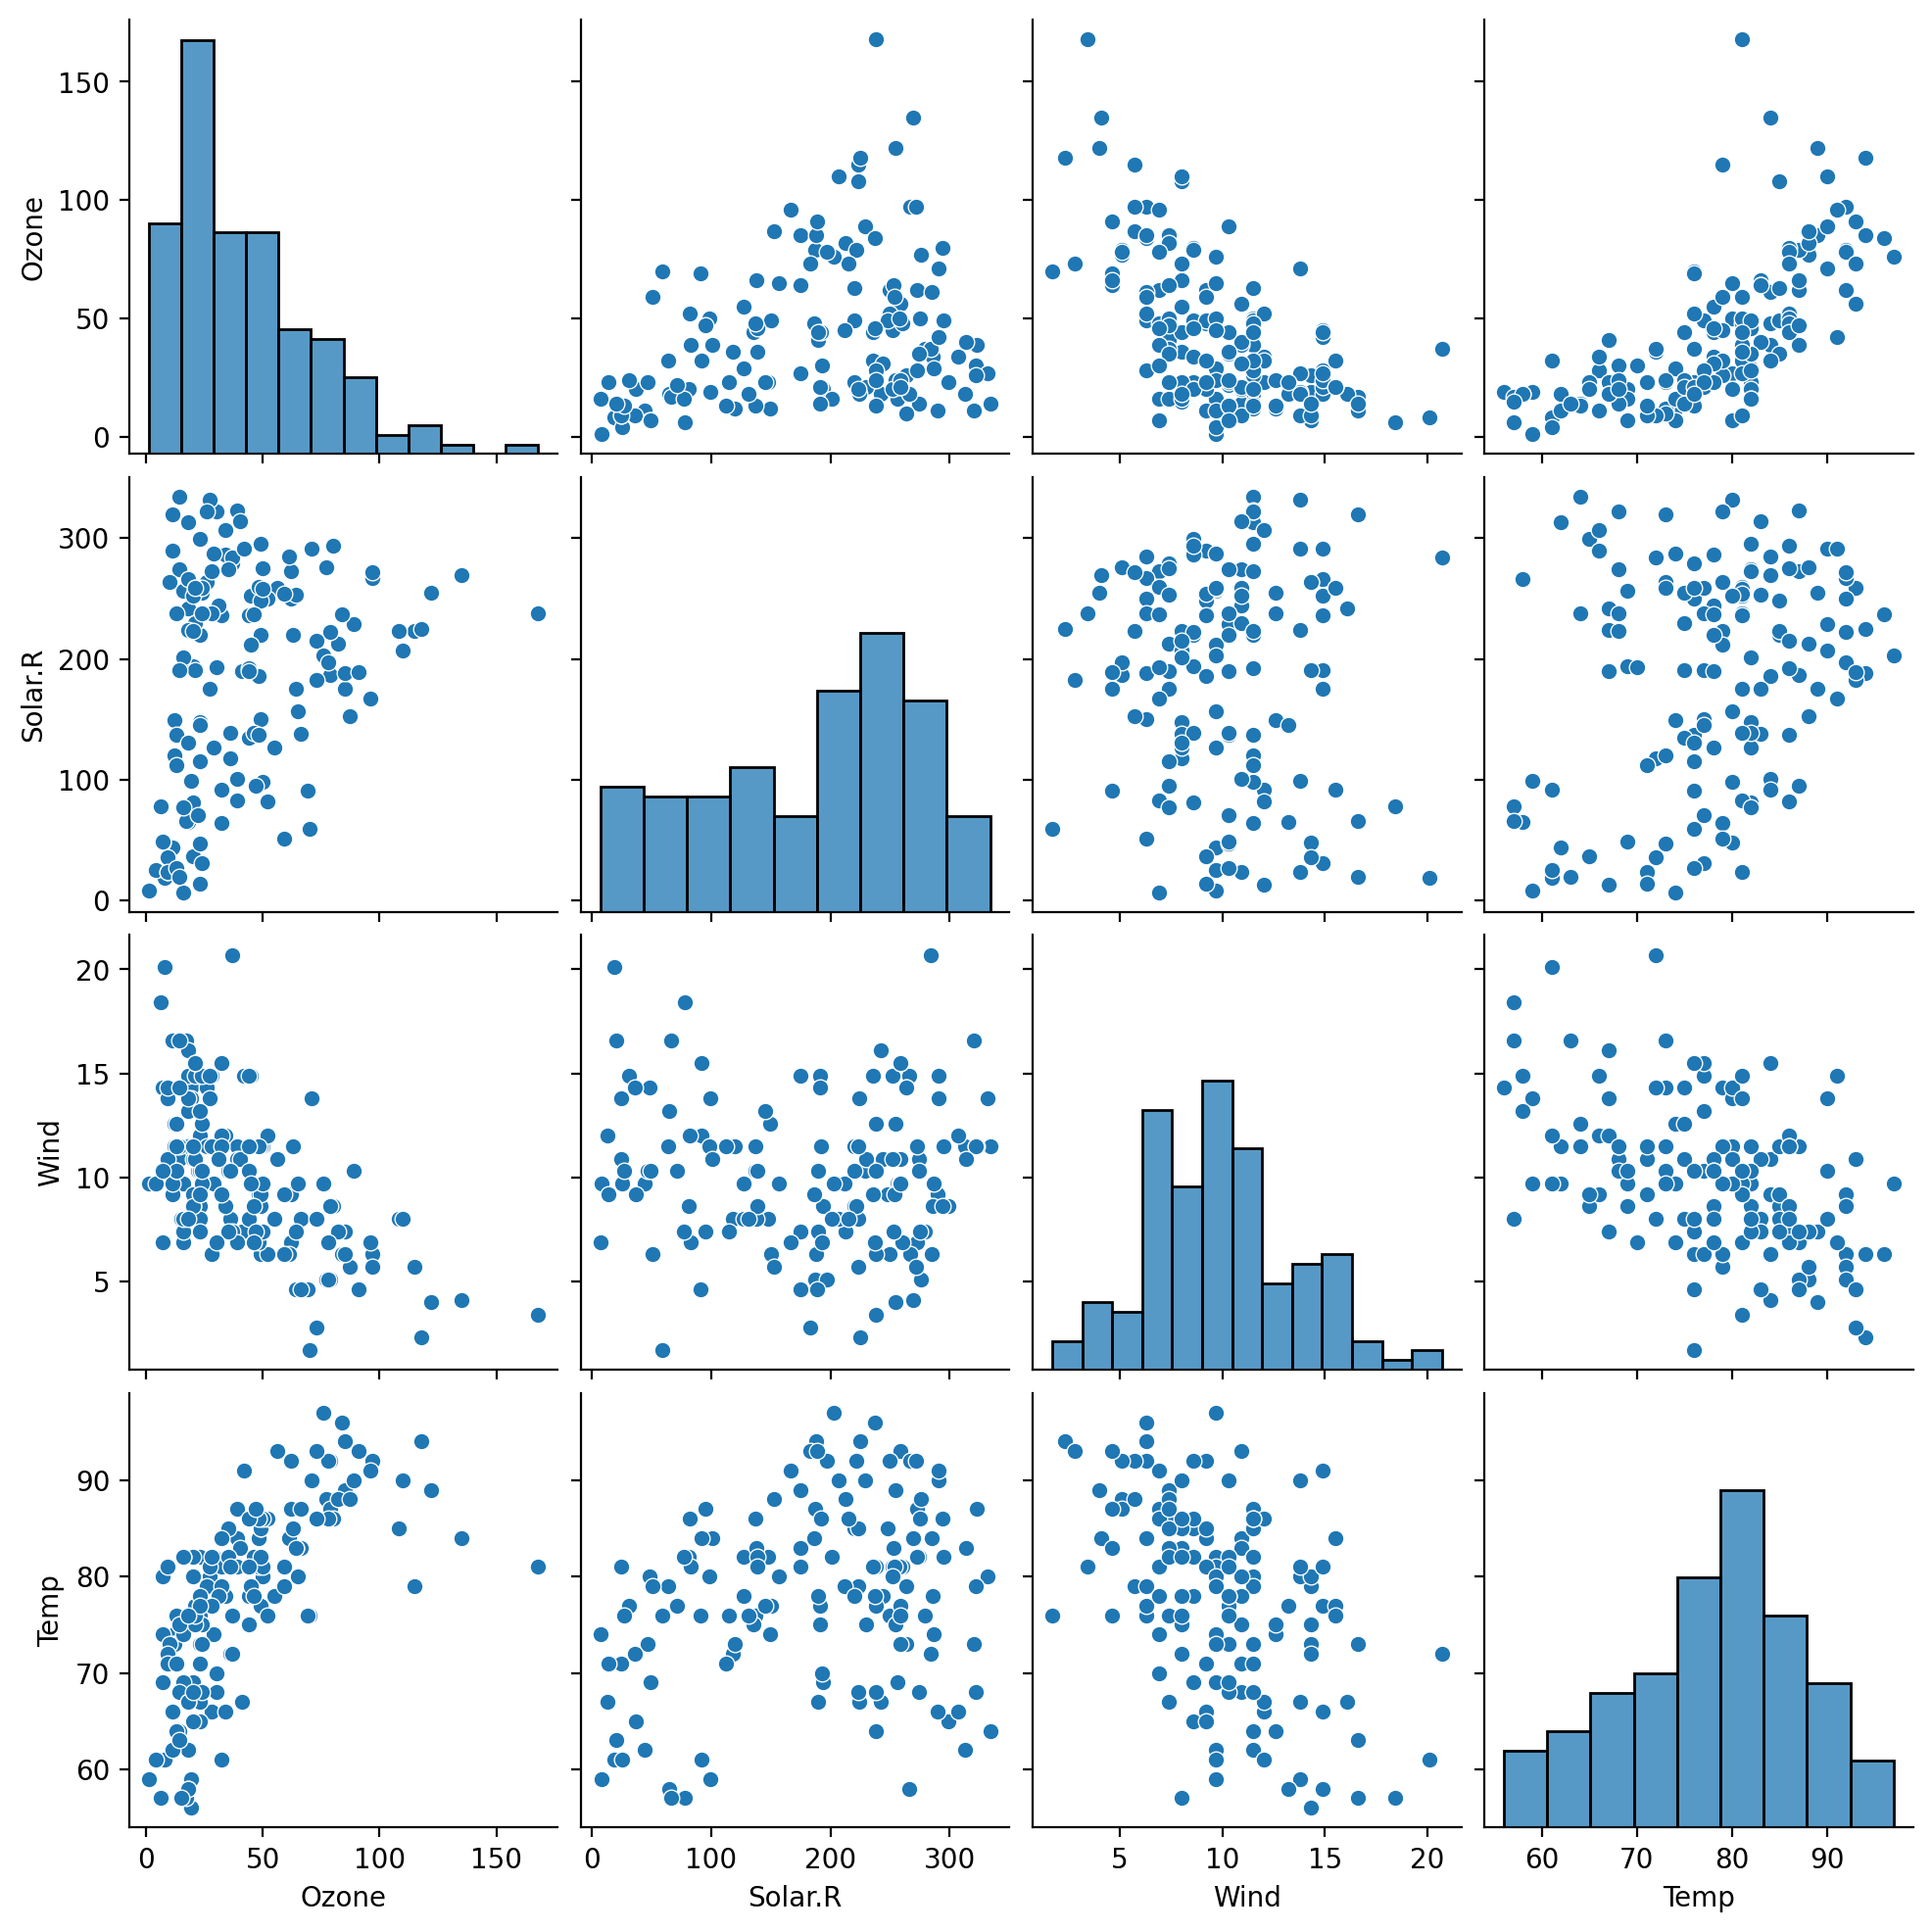

In [13]:
# PairPlot
sns.pairplot(air)
plt.show()

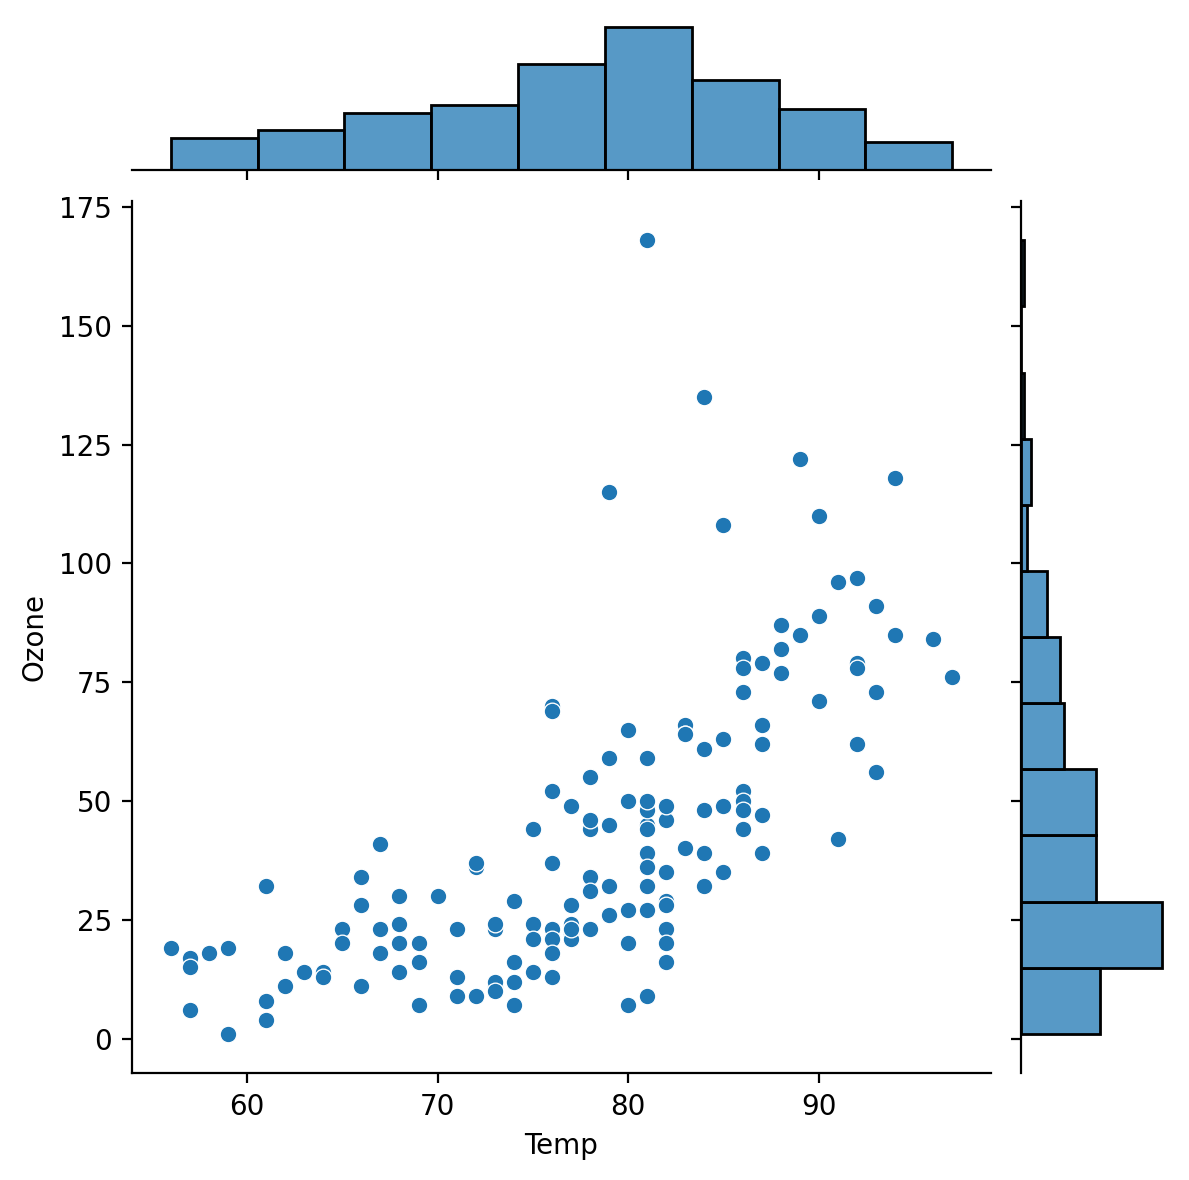

In [14]:
# JointPlot
sns.jointplot(x='Temp', y='Ozone', data=air)
plt.show()

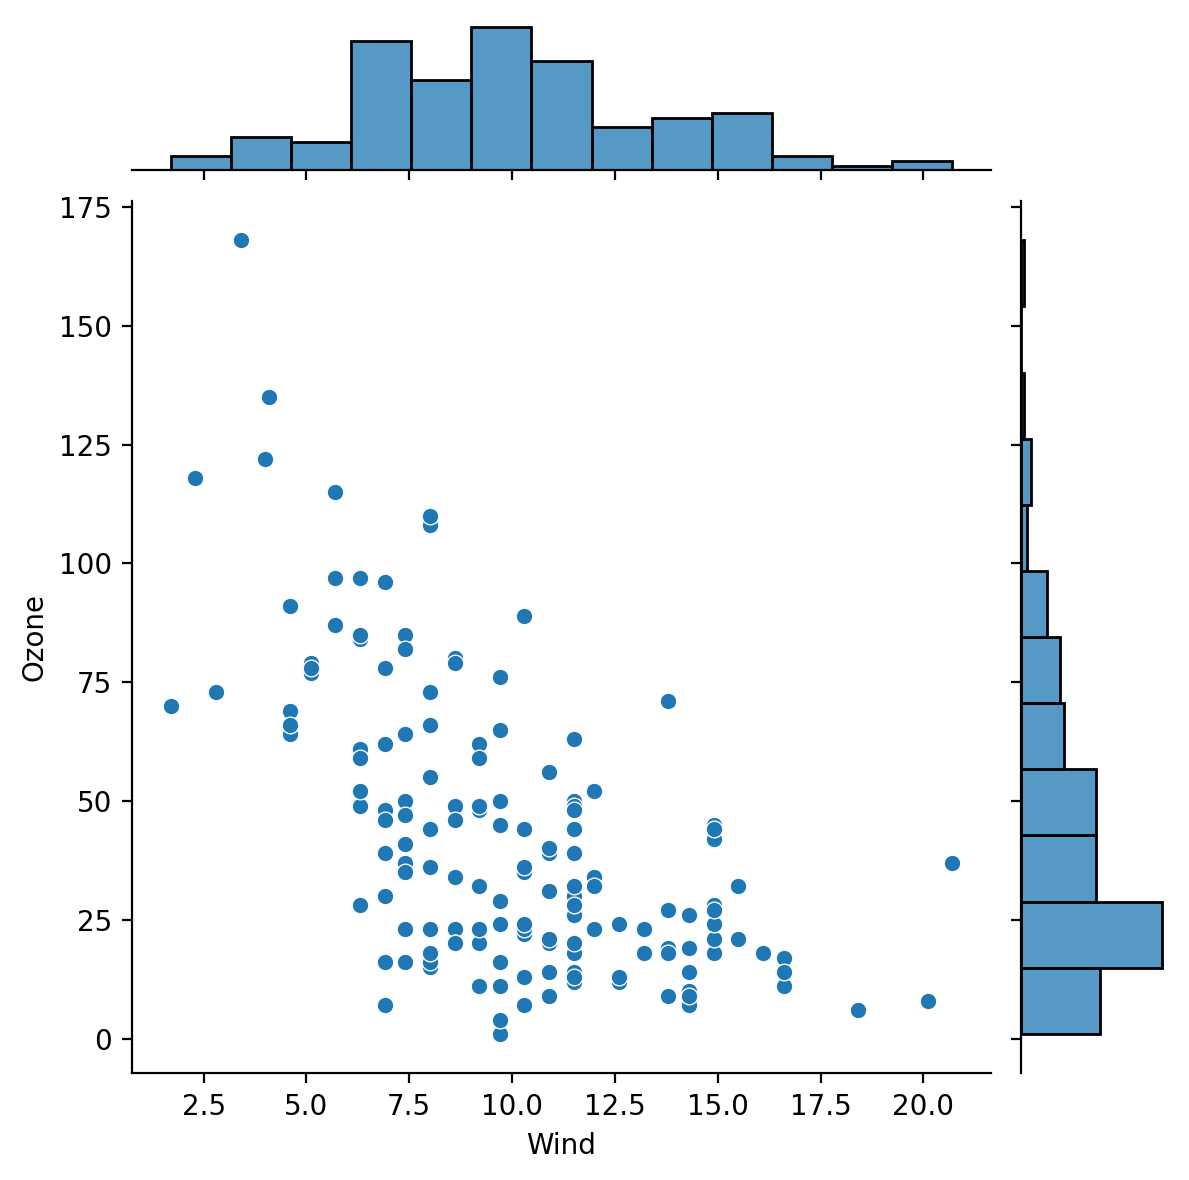

In [15]:
sns.jointplot(x='Wind', y='Ozone', data=air, kind='scatter')
plt.show()

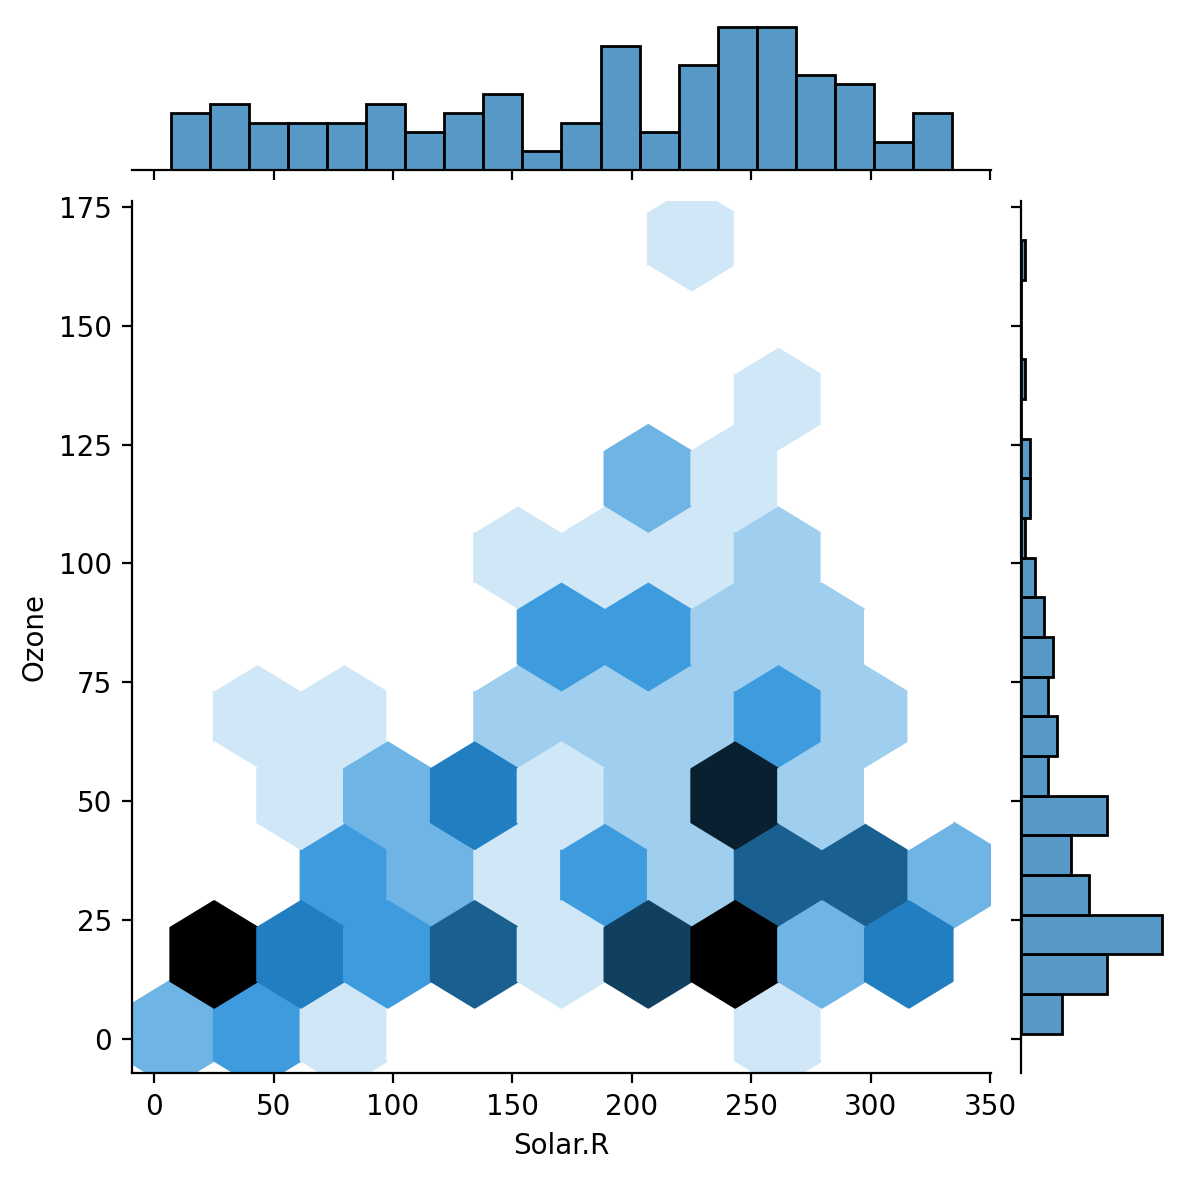

In [16]:
sns.jointplot(x='Solar.R', y='Ozone', data=air, kind='hex', marginal_kws=dict(bins=20))
plt.show()

In [17]:
# 상관 계수와 p-value를 통해 상관 분석 수행
result = spst.pearsonr(air['Temp'], air['Ozone'])

print(result)
print('* 상관계수:', result[0]) # 상관 계수는 -1부터 1사이의 값을 가짐
print('* p-value:', result[1])

PearsonRResult(statistic=np.float64(0.6833717861490116), pvalue=np.float64(2.197769800200178e-22))
* 상관계수: 0.6833717861490116
* p-value: 2.197769800200178e-22


In [18]:
air2 = air.loc[air['Solar.R'].notnull()]
result = spst.pearsonr(air2['Solar.R'], air2['Ozone'])

print(result)
print('* 상관계수:', result[0])
print('* p-value:', result[1])

PearsonRResult(statistic=np.float64(0.2800681334905376), pvalue=np.float64(0.000617587878856653))
* 상관계수: 0.2800681334905376
* p-value: 0.000617587878856653


In [19]:
# Pandas의 corr()메소드를 통한 상관계수 확인
air.corr(numeric_only=True)

,Ozone,Solar.R,Wind,Temp
Ozone,1.000000,0.280068,-0.605478,0.683372
Solar.R,0.280068,1.000000,-0.056792,0.275840
Wind,-0.605478,-0.056792,1.000000,-0.457988
Temp,0.683372,0.275840,-0.457988,1.000000


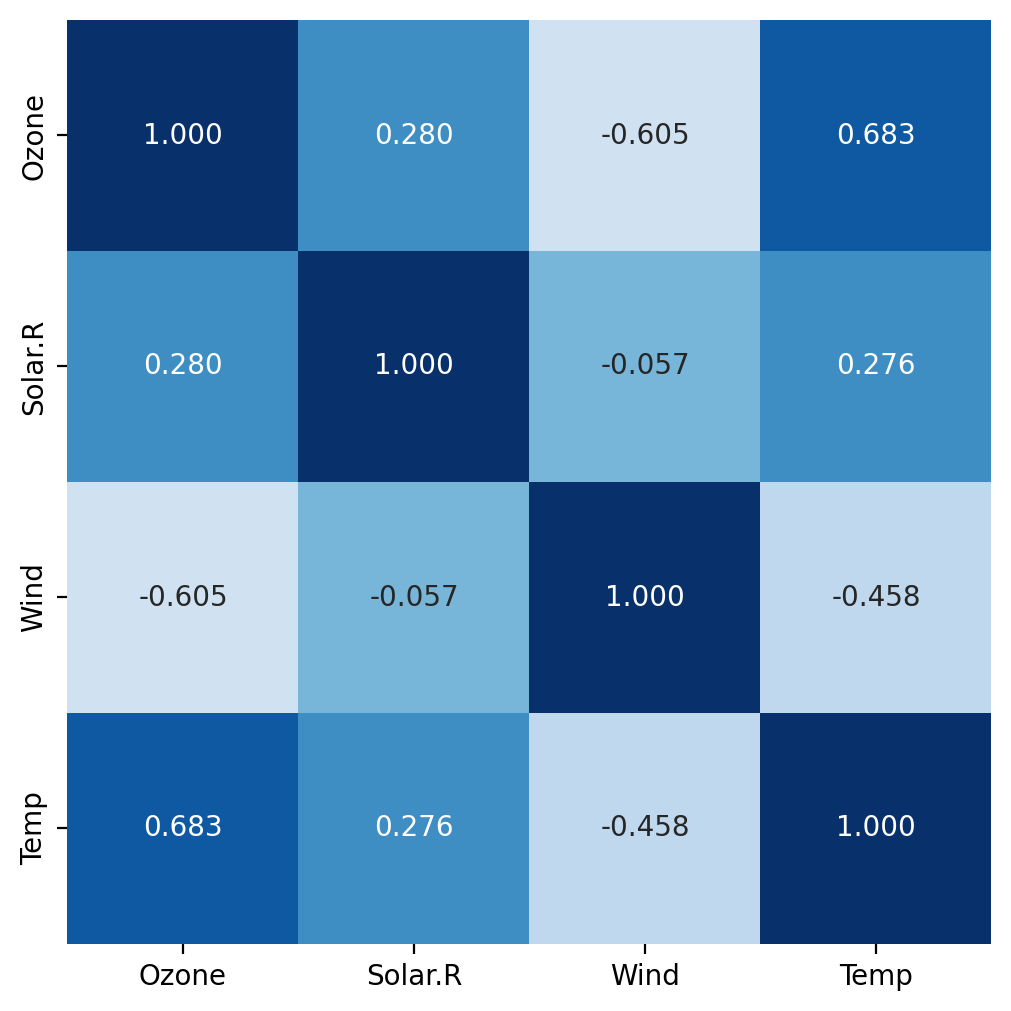

In [20]:
# heatmap을 이용해 시각화
plt.figure(figsize=(6, 6))
sns.heatmap(air.corr(numeric_only=True),
            annot=True,
            fmt='.3f',
            cmap='Blues',
            vmin=-1,
            vmax=1,
            square=True,
            cbar=False)
plt.show()

 # **이변량 분석 ② - 범주형 → 수치형**

In [21]:
# 데이터 읽어오기
path = '/content/drive/MyDrive/DataForSudy/titanic.csv'
titanic = pd.read_csv(path)

#확인
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


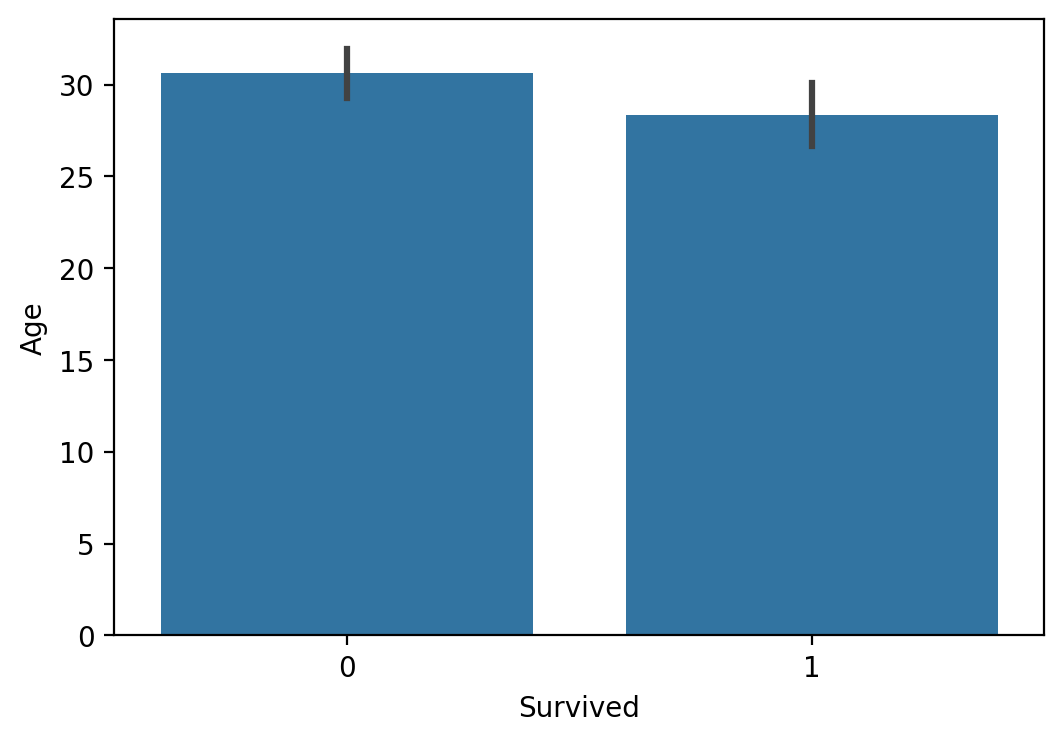

In [22]:
# barplot
sns.barplot(x='Survived', y='Age', data=titanic)
plt.show()

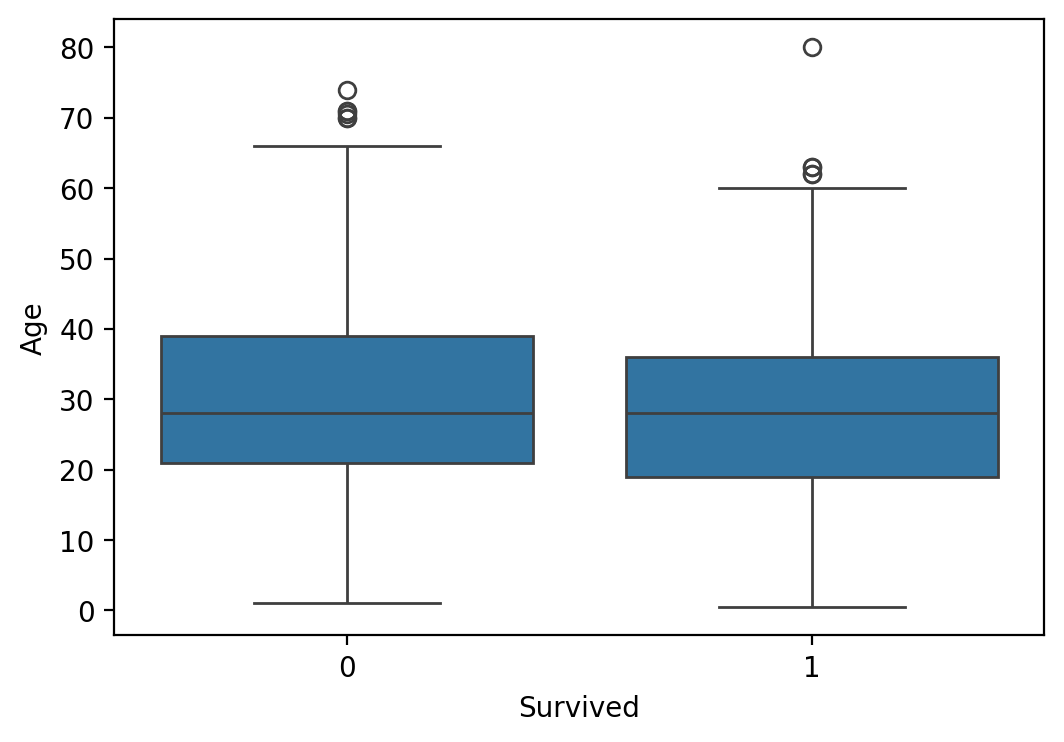

In [24]:
# Boxplot
sns.boxplot(x='Survived', y='Age', data=titanic)
plt.show()

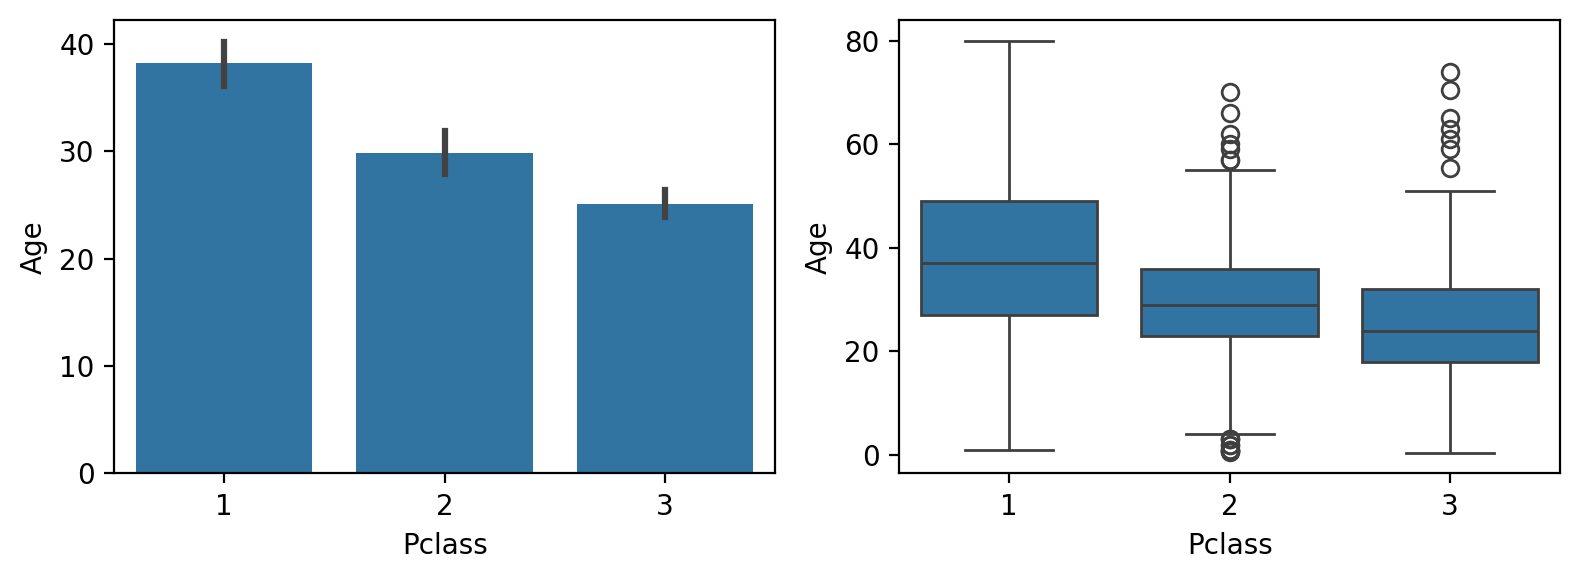

In [25]:
plt.figure(figsize=(8, 3))
plt.subplot(1, 2, 1)
sns.barplot(x='Pclass', y='Age', data=titanic)
plt.subplot(1, 2, 2)
sns.boxplot(x='Pclass', y='Age', data=titanic)
plt.tight_layout()
plt.show()

In [ ]:
# 범주가 2개일 때는 t-검정
# 범주가 3개일 때는 ANOVA

In [27]:
import random as rd
pop1 = [round(rd.normalvariate(160, 10), 1) for i in range(100000)]
pop2 = [round(rd.normalvariate(170, 10), 1) for i in range(100000)]

# 확인
print('* pop1:', pop1[:10])
print('* pop2:', pop2[:10])

* pop1: [155.5, 172.5, 150.5, 146.3, 171.3, 147.6, 154.8, 178.8, 162.1, 140.9]
* pop2: [187.9, 190.2, 174.2, 159.3, 161.9, 161.6, 163.9, 171.4, 160.7, 175.0]


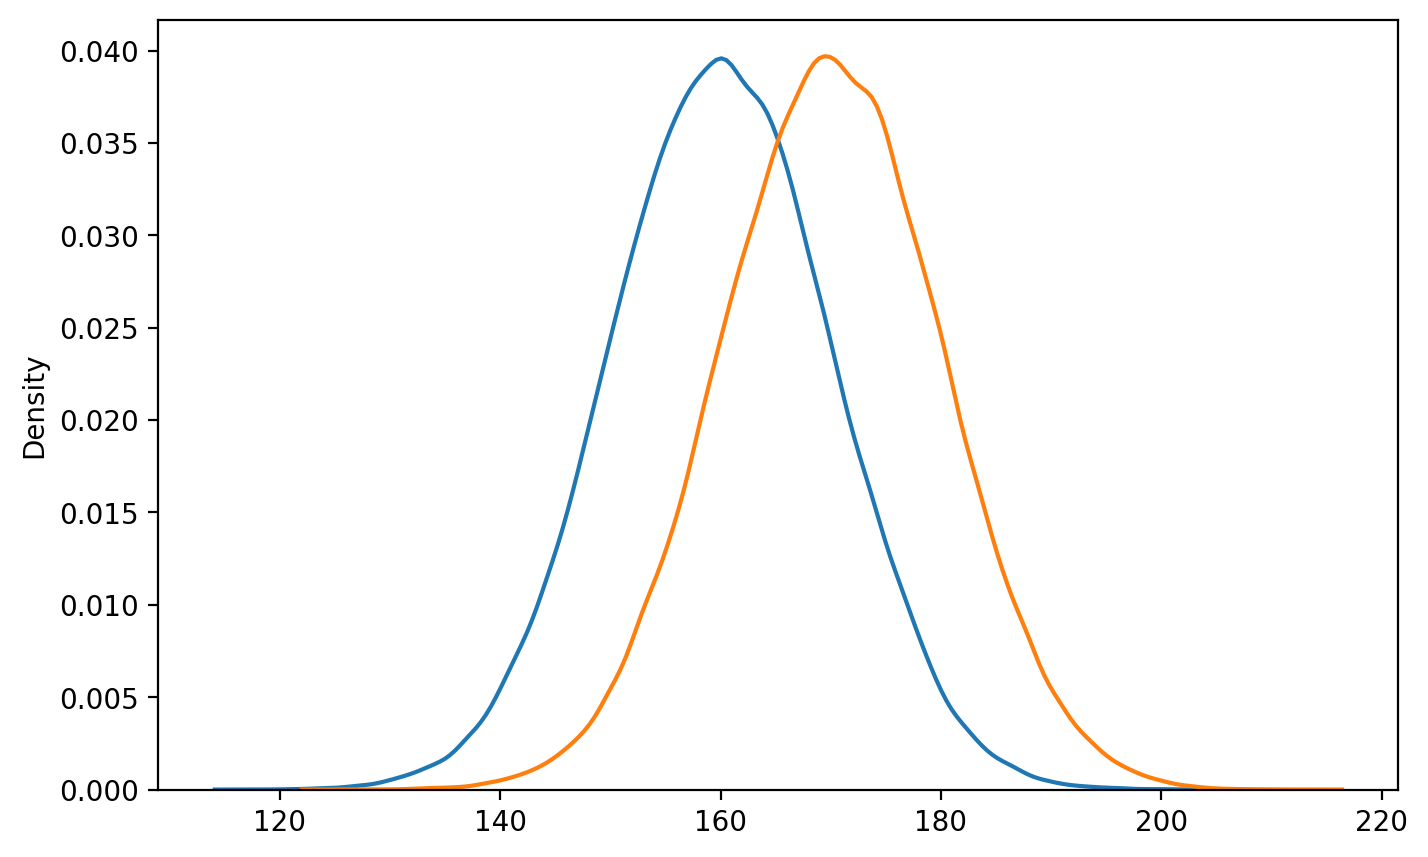

In [28]:
plt.figure(figsize=(8, 5))
sns.kdeplot(pop1)
sns.kdeplot(pop2)
plt.show()

In [29]:
s1 = rd.sample(pop1, 200)
s2 = rd.sample(pop1, 200)
t_test = spst.ttest_ind(s1, s2)

print('* t-statistic:', t_test[0])
print('* p-value:', t_test[1])

* t-statistic: 0.3729815149251316
* p-value: 0.7093607612435289


* 전체평균: 29.69911764705882


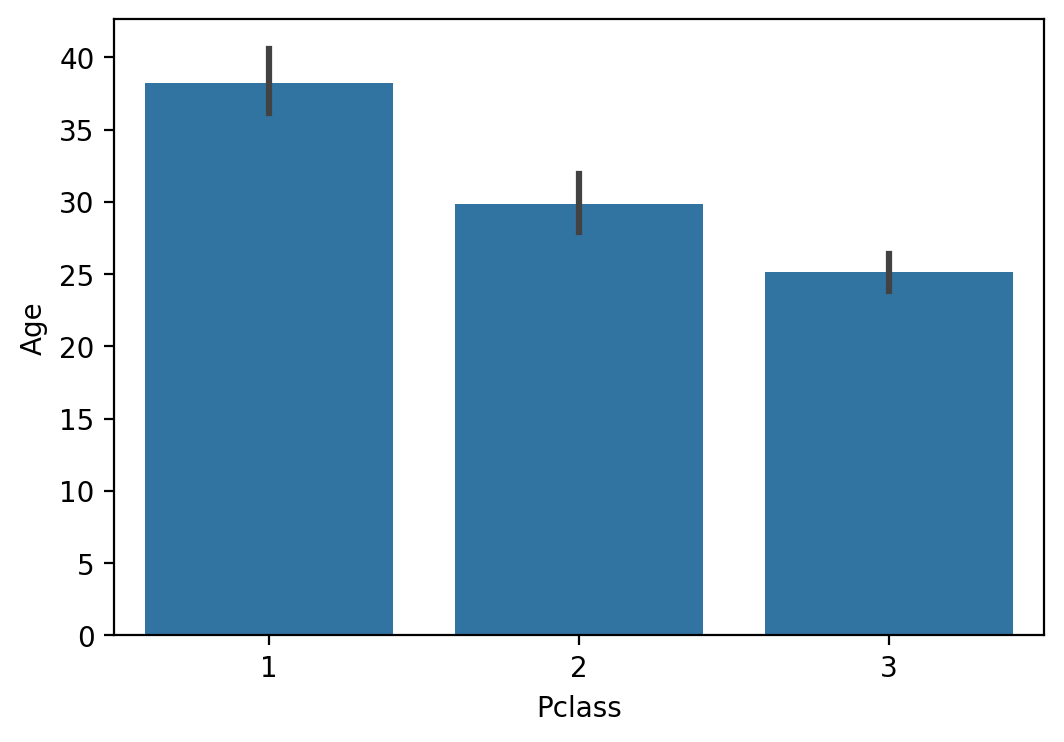

In [30]:
print('* 전체평균: {}'.format(titanic['Age'].mean()))

sns.barplot(x='Pclass', y='Age', data=titanic)
plt.show()

In [31]:
temp = titanic.loc[titanic['Age'].notnull()]
p1 = temp.loc[titanic['Pclass']==1, 'Age']
p2 = temp.loc[titanic['Pclass']==2, 'Age']
p3 = temp.loc[titanic['Pclass']==3, 'Age']
anova = spst.f_oneway(p1, p2, p3)
print('* f-statistic:', anova[0])
print('* p-value:', anova[1])

* f-statistic: 57.443484340676214
* p-value: 7.487984171959904e-24


* 전체평균: 32.204207968574636


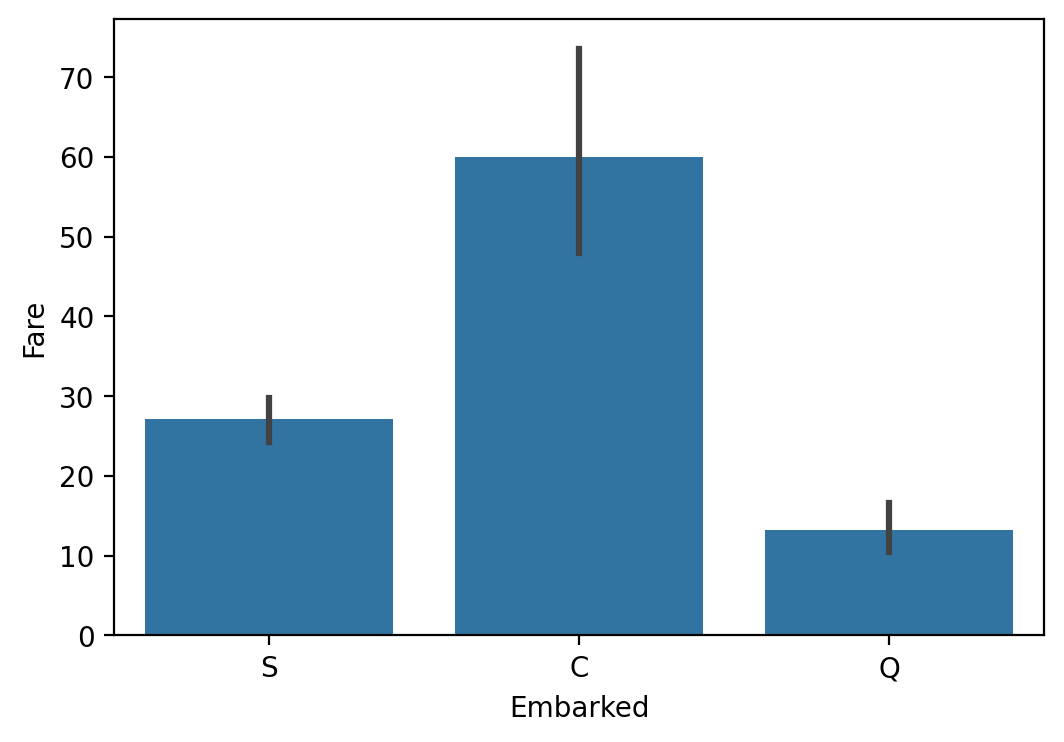

In [32]:
print('* 전체평균: {}'.format(titanic['Fare'].mean()))

sns.barplot(x='Embarked', y='Fare', data=titanic)
plt.show()

 # **이변량 분석 ③ - 범주형 → 범주형**

In [33]:
# 환경 준비
from statsmodels.graphics.mosaicplot import mosaic #mosaicplot을 그리기 위한 라이브러리

In [34]:
# 데이터 읽어오기
path = '/content/drive/MyDrive/DataForSudy/titanic.1.csv'
titanic = pd.read_csv(path)

#확인
titanic.head()

,Survived,Pclass,Title,Sex,Age,Fare,Embarked,AgeGroup,Family,Mother
0,0,3,Mr,male,22.0,7.2500,S,Age_20,2,0
1,1,1,Mrs,female,38.0,71.2833,C,Age_30,2,0
2,1,3,Miss,female,26.0,7.9250,S,Age_20,1,0
3,1,1,Mrs,female,35.0,53.1000,S,Age_30,2,0
4,0,3,Mr,male,35.0,8.0500,S,Age_30,1,0


In [35]:
# 범주 -> 범주를 비교하기 위해서는 교차표를 만들어야 함
pd.crosstab(titanic['Sex'], titanic['Survived'])

Survived,0,1
Sex,,
female,81,233
male,468,109


In [37]:
# 다음과 같이 groupby()메소드를 사용해도 가능
tmp = titanic.groupby(by=['Sex', 'Survived'], as_index=False)['Fare'].count()
tmp.columns = ['Sex', 'Survived', 'Cnt']
tmp.pivot(index='Sex', columns='Survived', values='Cnt')

Survived,0,1
Sex,,
female,81,233
male,468,109


In [38]:
pd.crosstab(titanic['Embarked'], titanic['Survived'])

Survived,0,1
Embarked,,
C,75,93
Q,47,30
S,427,219


In [39]:
pd.crosstab(titanic['Embarked'], titanic['Survived'], normalize='columns')

Survived,0,1
Embarked,,
C,0.136612,0.271930
Q,0.085610,0.087719
S,0.777778,0.640351


In [40]:
pd.crosstab(titanic['Embarked'], titanic['Survived'], normalize='index')

Survived,0,1
Embarked,,
C,0.446429,0.553571
Q,0.610390,0.389610
S,0.660991,0.339009


In [41]:
pd.crosstab(titanic['Embarked'], titanic['Survived'], normalize='all')

Survived,0,1
Embarked,,
C,0.084175,0.104377
Q,0.052750,0.033670
S,0.479237,0.245791


In [42]:
# 100% Stacked Bar
table = pd.crosstab(titanic['Pclass'], titanic['Survived'], normalize='index')
table

Survived,0,1
Pclass,,
1,0.370370,0.629630
2,0.527174,0.472826
3,0.757637,0.242363


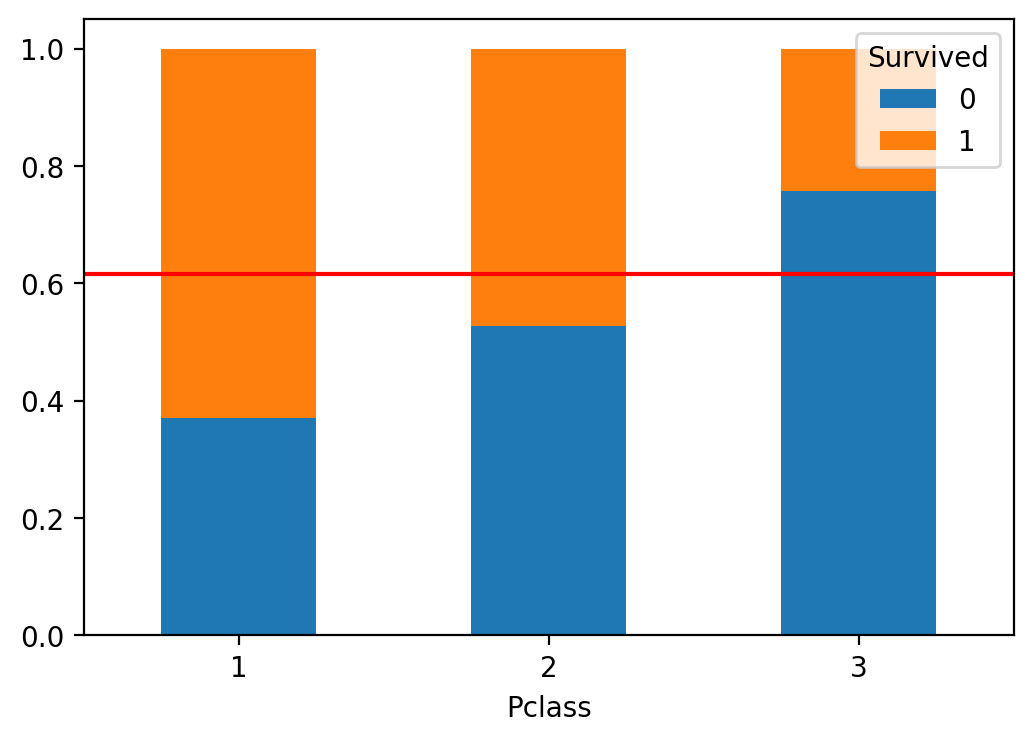

In [43]:
table.plot(kind='bar', stacked=True)

plt.axhline(1-titanic['Survived'].mean(), color='r')
plt.xticks(rotation=0)
plt.show()

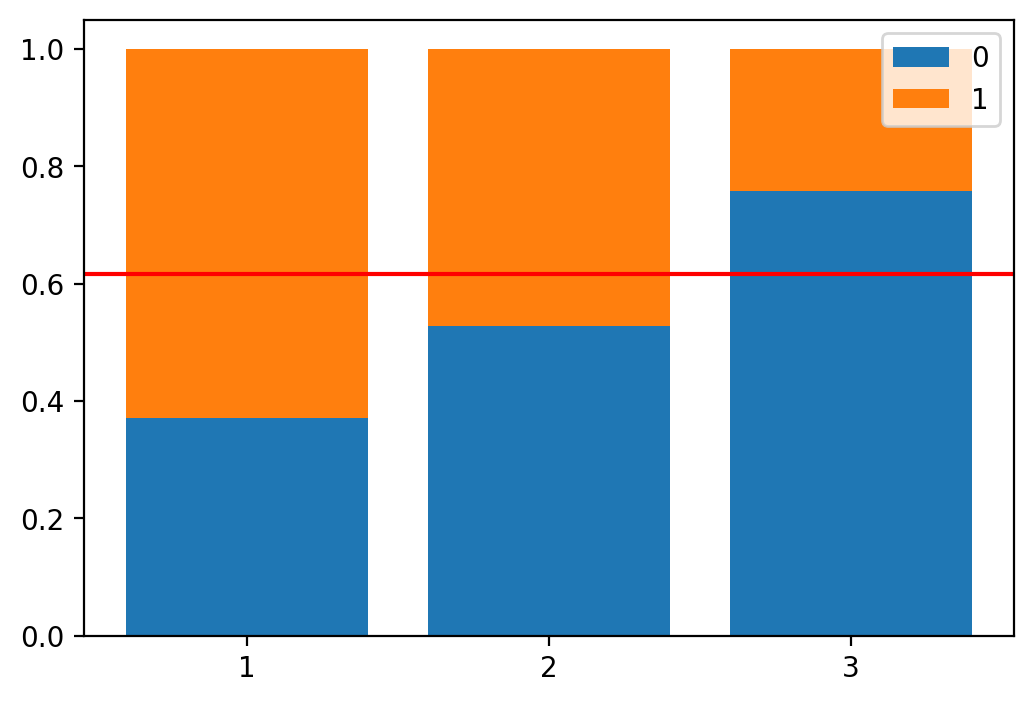

In [44]:
plt.bar(table.index.astype(str), table[0])
plt.bar(table.index.astype(str), table[1], bottom=table[0])
plt.legend(['0', '1'])
plt.axhline(1-titanic['Survived'].mean(), color='r')
plt.show()

Survived,0,1
Sex,,
female,0.257962,0.742038
male,0.811092,0.188908


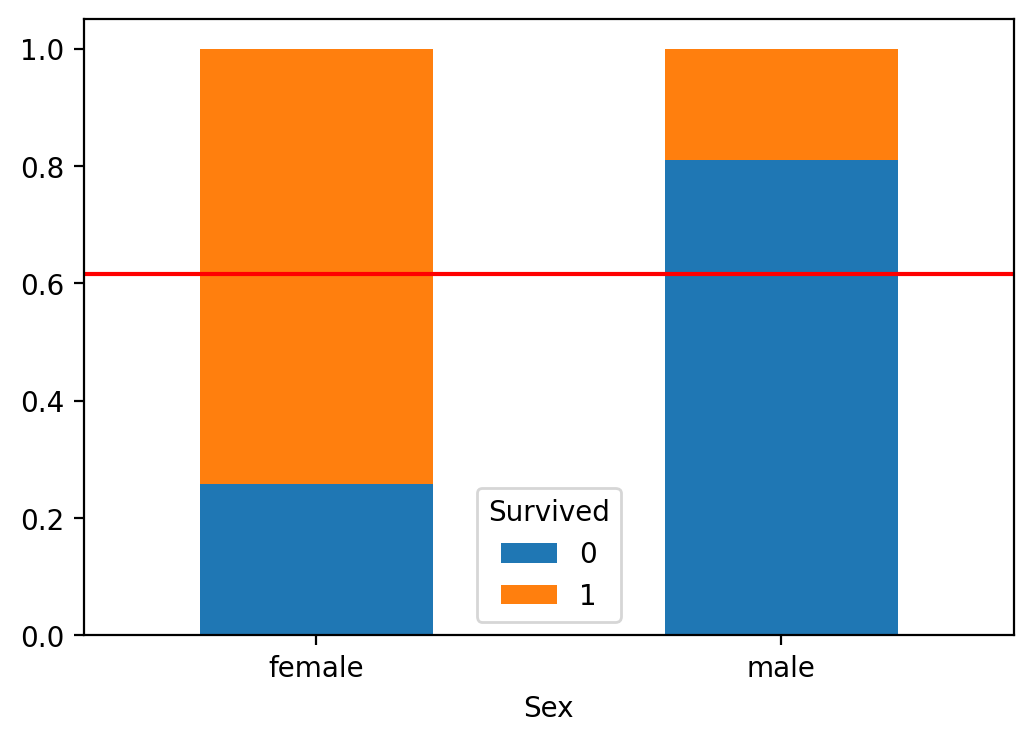

In [45]:
table = pd.crosstab(titanic['Sex'], titanic['Survived'], normalize='index')
display(table)

table.plot(kind='bar', stacked=True)
plt.axhline(1-titanic['Survived'].mean(), color='r')
plt.xticks(rotation=0)
plt.show()

Survived,0,1
Embarked,,
C,0.446429,0.553571
Q,0.610390,0.389610
S,0.660991,0.339009


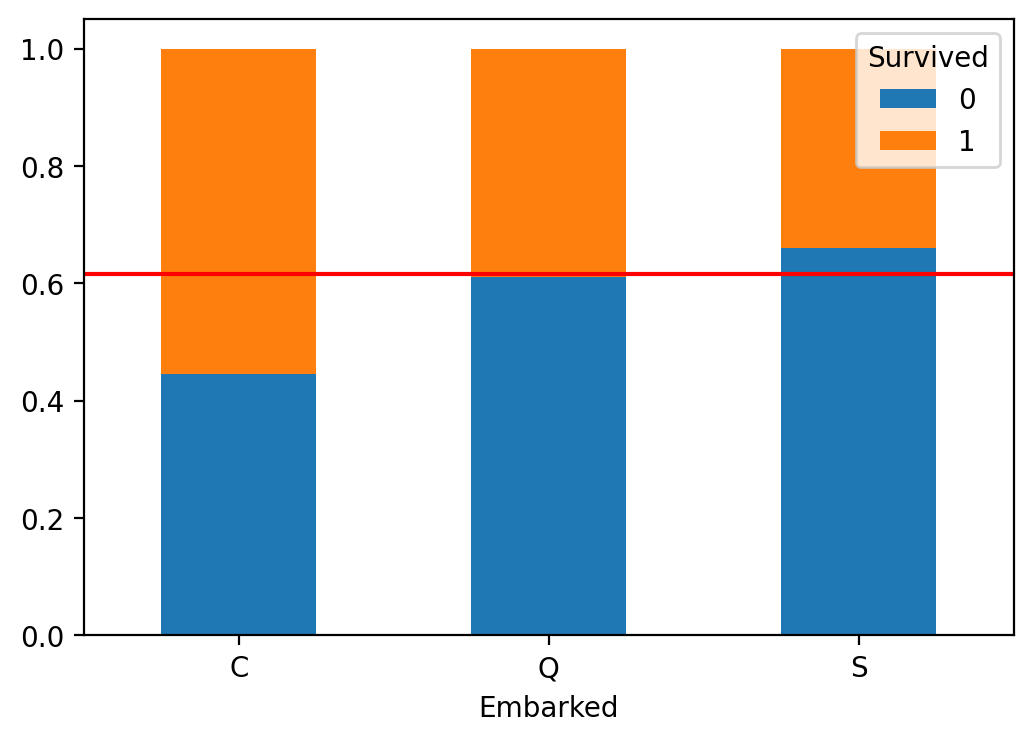

In [46]:
table = pd.crosstab(titanic['Embarked'], titanic['Survived'], normalize='index')
display(table)

table.plot(kind='bar', stacked=True)
plt.axhline(1-titanic['Survived'].mean(), color='r')
plt.xticks(rotation=0)
plt.show()

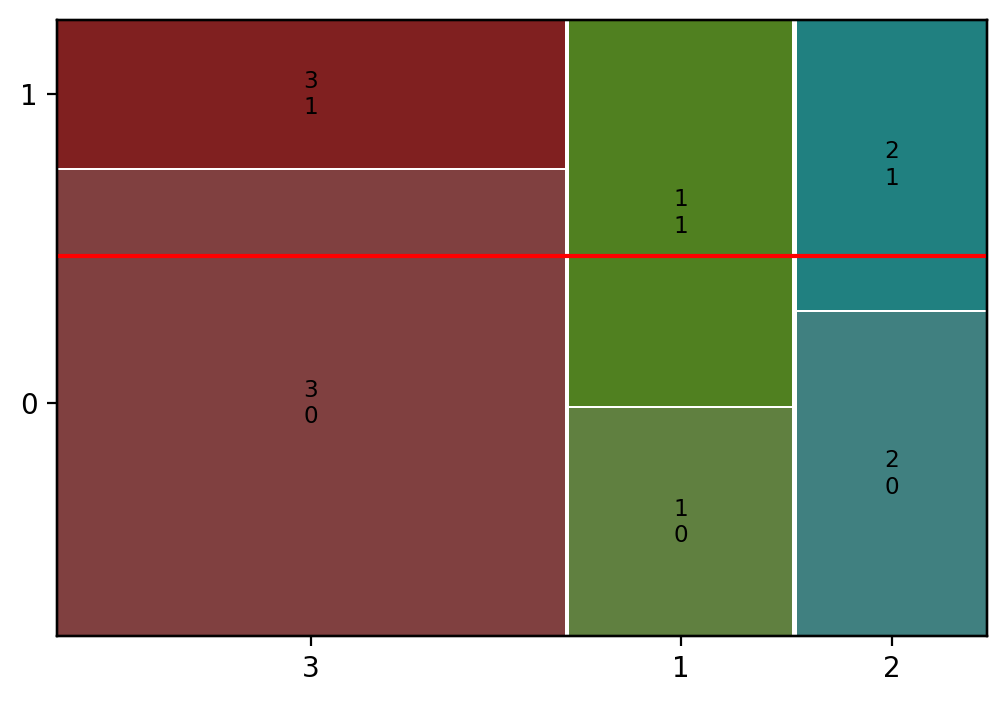

In [47]:
# Mosaic Plot
mosaic(titanic, ['Pclass', 'Survived'])
plt.axhline(1-titanic['Survived'].mean(), color='r')
plt.show()

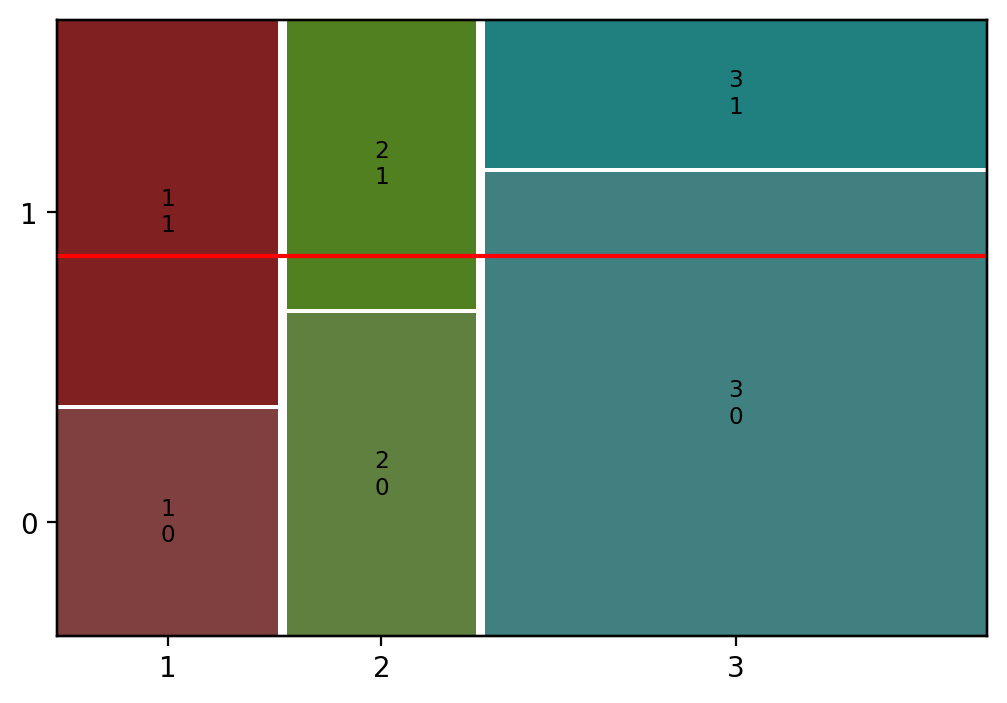

In [48]:
mosaic(titanic.sort_values(['Pclass', 'Survived']), ['Pclass', 'Survived'], gap=0.01)
plt.axhline(1-titanic['Survived'].mean(), color='r')
plt.show()

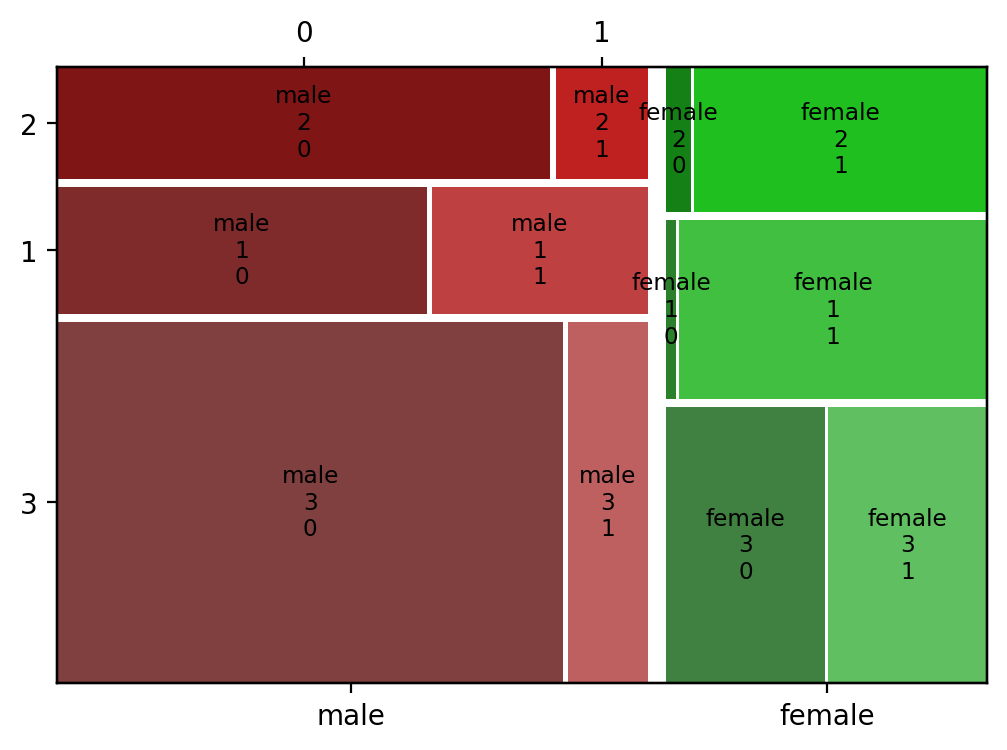

In [49]:
mosaic(titanic, ['Sex', 'Pclass', 'Survived'], gap=0.02)
plt.show()

In [50]:
# 카이제곱검정을 통해 수치화
table = pd.crosstab(titanic['Pclass'], titanic['Survived'])
table

result = spst.chi2_contingency(table)
print('* 카이제곱통계량:', result[0])
print('* p-value:', result[1])
print('* 기대빈도:\n',result[3])

* 카이제곱통계량: 102.88898875696056
* p-value: 4.549251711298793e-23
* 기대빈도:
 [[133.09090909  82.90909091]
 [113.37373737  70.62626263]
 [302.53535354 188.46464646]]


 # **이변량 분석 ④ - 수치형 → 범주형**

In [51]:
# 환경 준비
import statsmodels.api as sm # 통계 분석을 위한 라이브러리

In [53]:
# 데이터 읽어오기
path = '/content/drive/MyDrive/DataForSudy/titanic.0.csv'
titanic = pd.read_csv(path)
titanic = titanic.loc[titanic['Age'].notnull()]

# 확인
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [54]:
# 데이터 읽어오기
path = '/content/drive/MyDrive/DataForSudy/admission_simple.csv'
admission = pd.read_csv(path)

# 확인
admission.head()

,GRE,TOEFL,RANK,SOP,LOR,GPA,RESEARCH,ADMIT
0,337,118,4,4.5,4.5,9.65,1,1
1,324,107,4,4.0,4.5,8.87,1,1
2,316,104,3,3.0,3.5,8.00,1,0
3,322,110,3,3.5,2.5,8.67,1,1
4,314,103,2,2.0,3.0,8.21,0,0


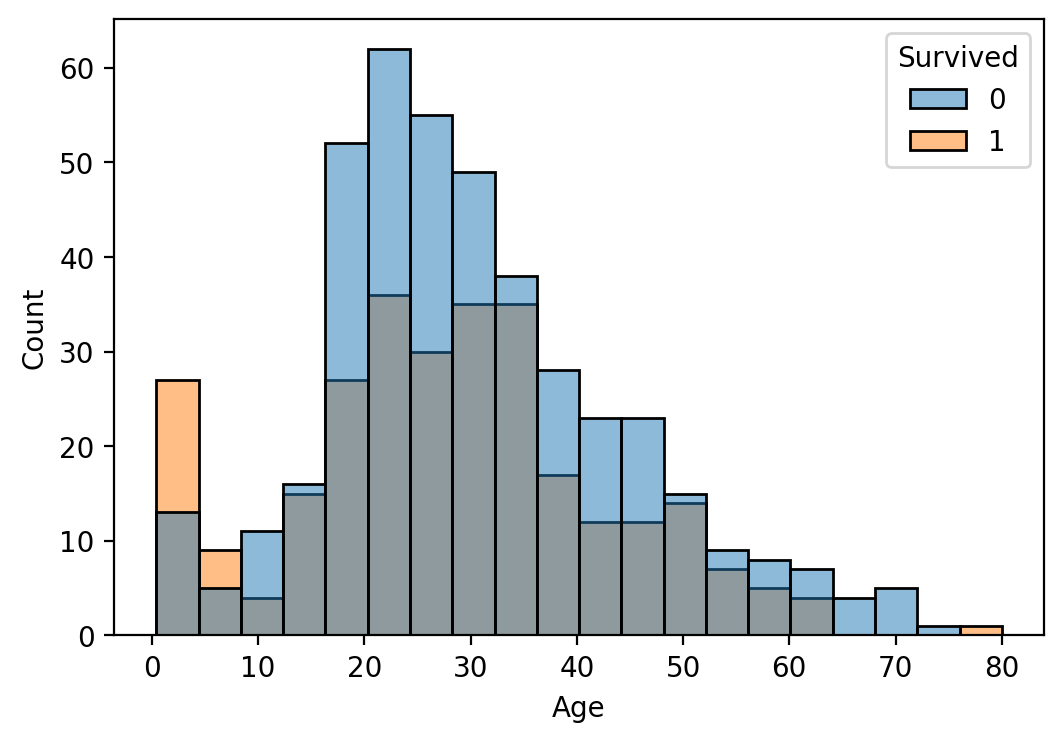

In [55]:
# histogram
sns.histplot(x='Age', hue='Survived', data=titanic, bins=20)
plt.show()

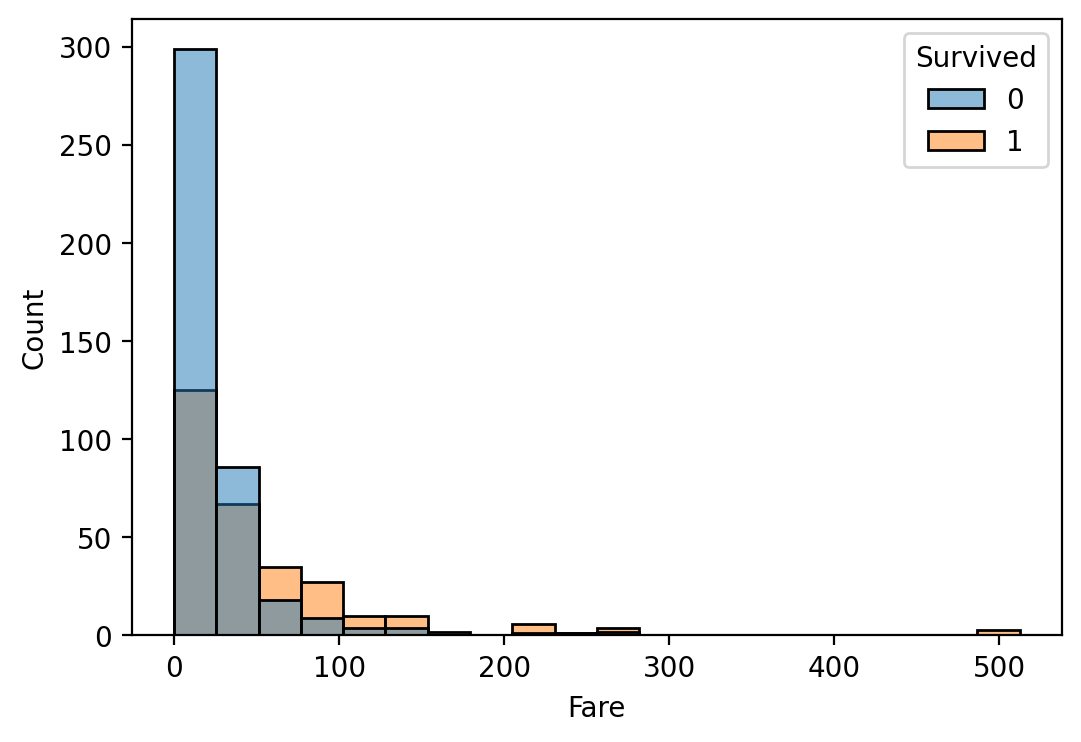

In [56]:
sns.histplot(x='Fare', hue='Survived', bins=20, data=titanic)
plt.show()

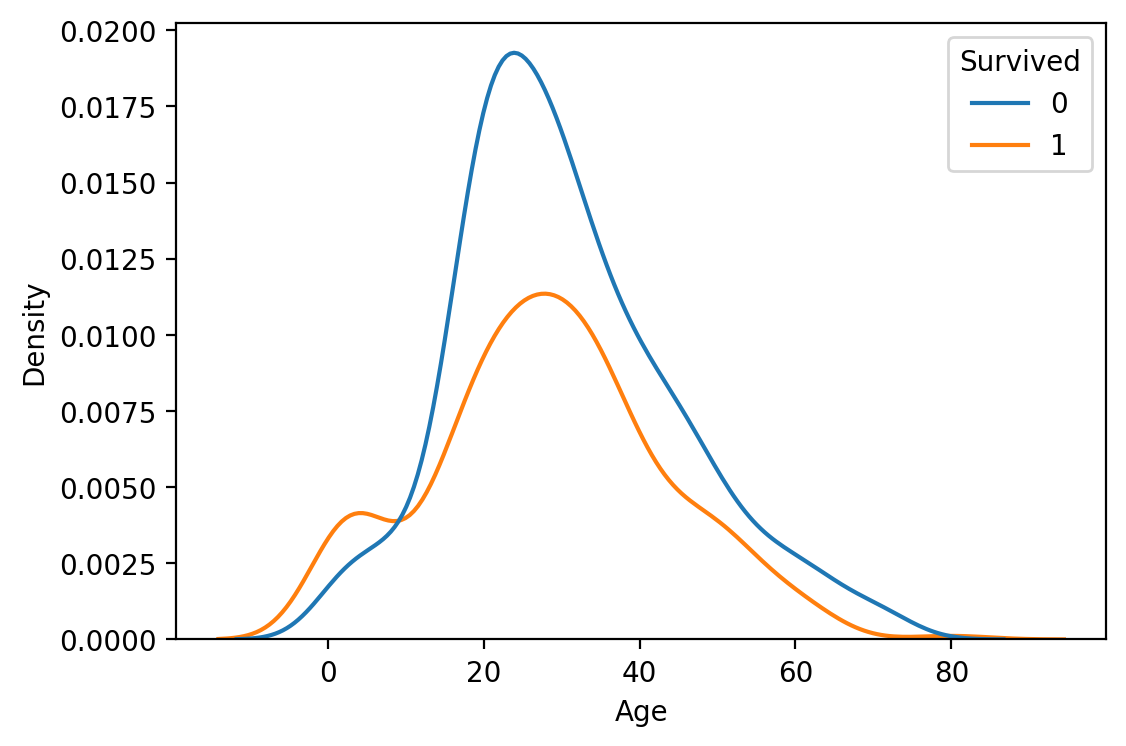

In [57]:
# Density Plot
sns.kdeplot(x='Age', hue='Survived', data=titanic)
plt.show()

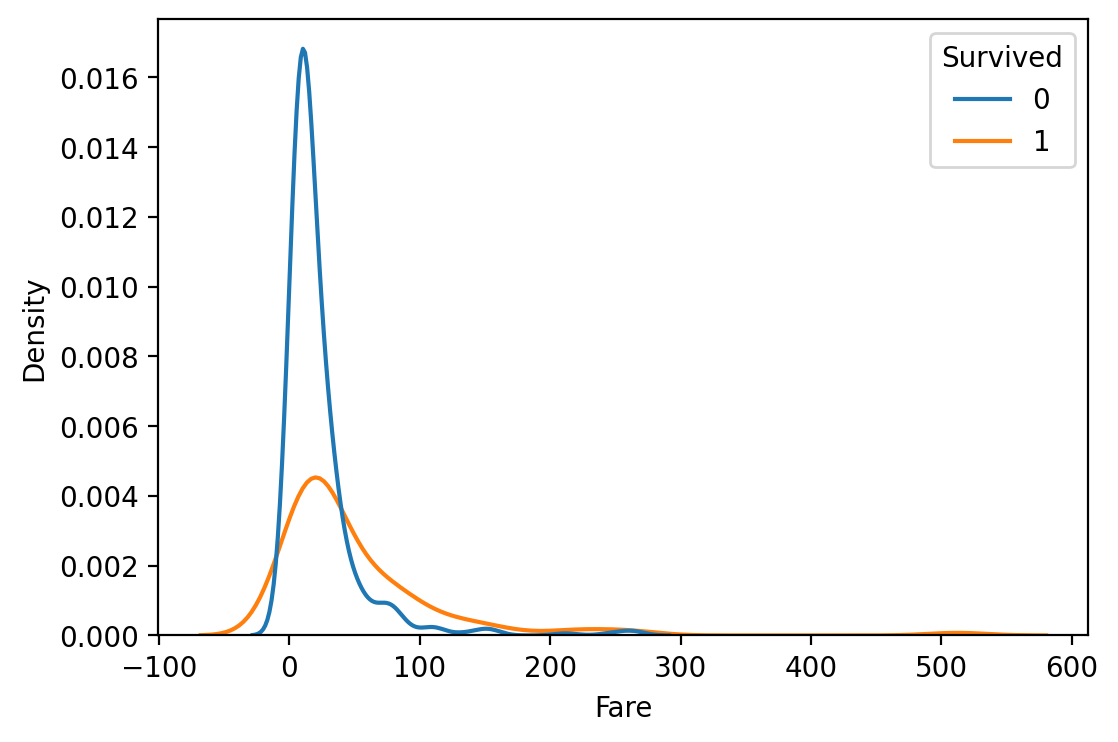

In [58]:
sns.kdeplot(x='Fare', hue='Survived', data=titanic)
plt.show()

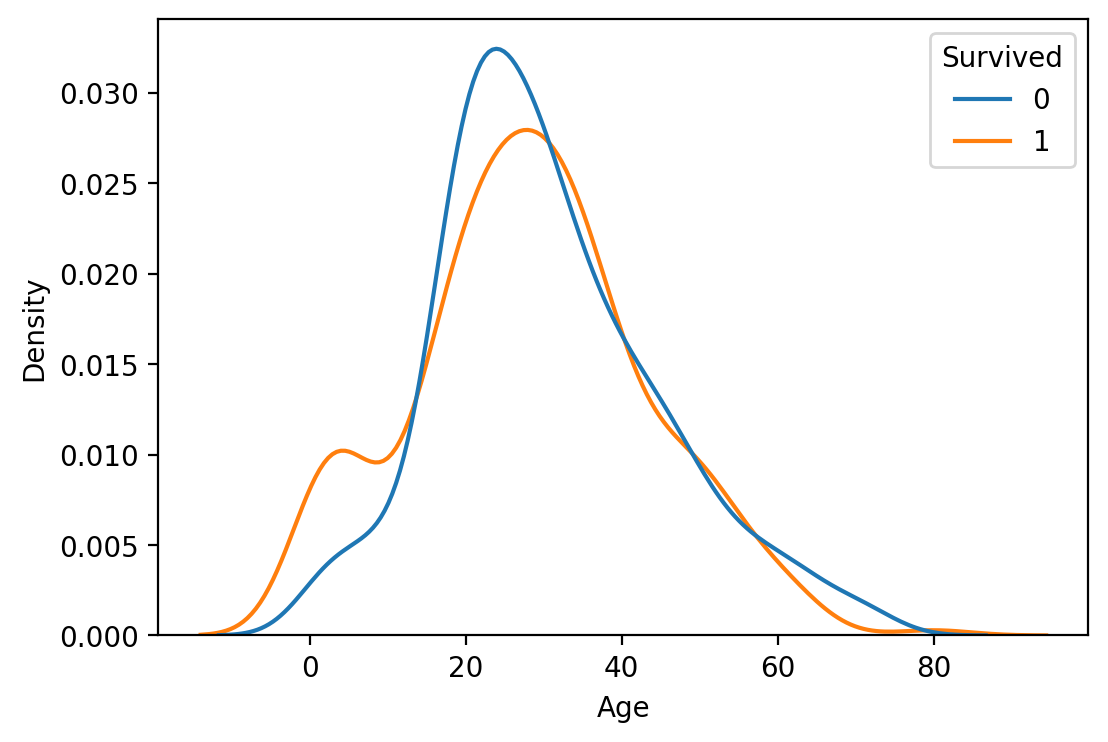

In [59]:
sns.kdeplot(x='Age', hue='Survived', data=titanic, common_norm=False)
plt.show()

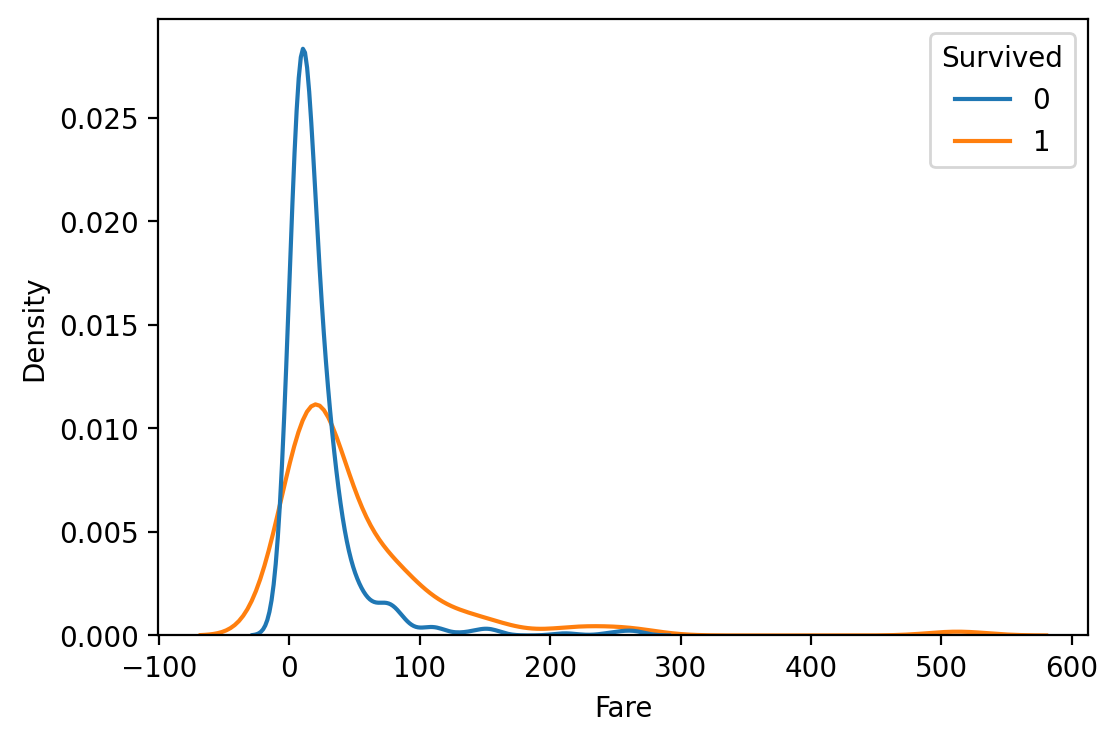

In [60]:
sns.kdeplot(x='Fare', hue='Survived', data=titanic, common_norm=False)
plt.show()

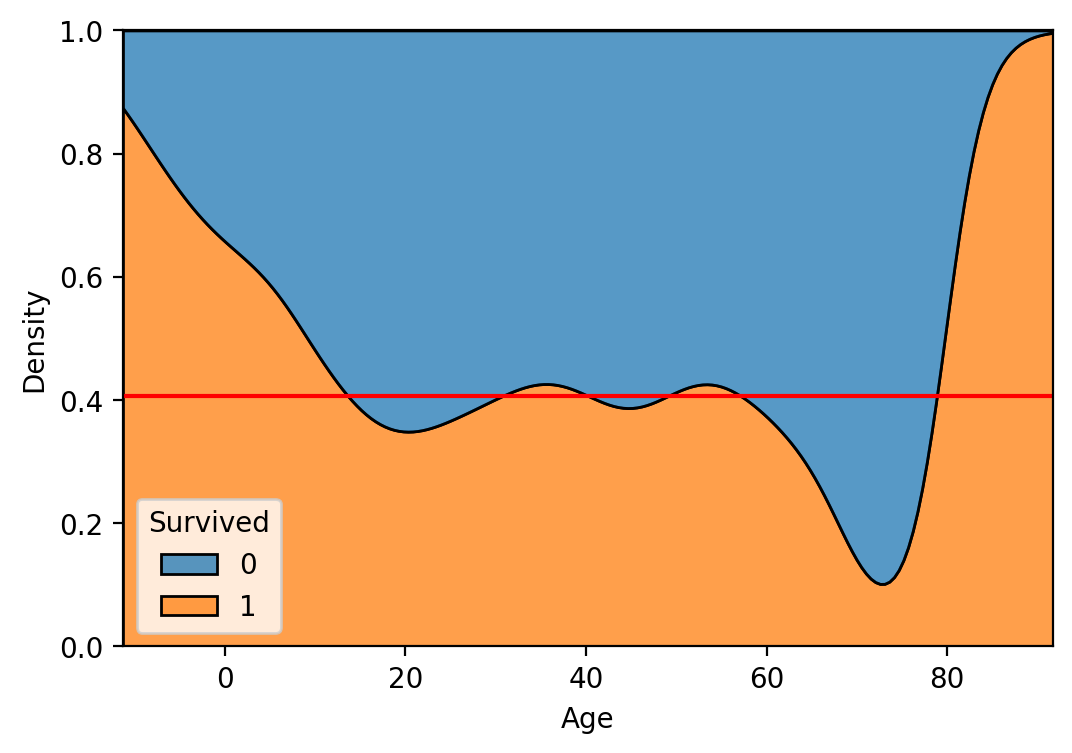

In [61]:
sns.kdeplot(x='Age', hue='Survived', data=titanic, multiple='fill')
plt.axhline(titanic['Survived'].mean(), color='r')
plt.show()

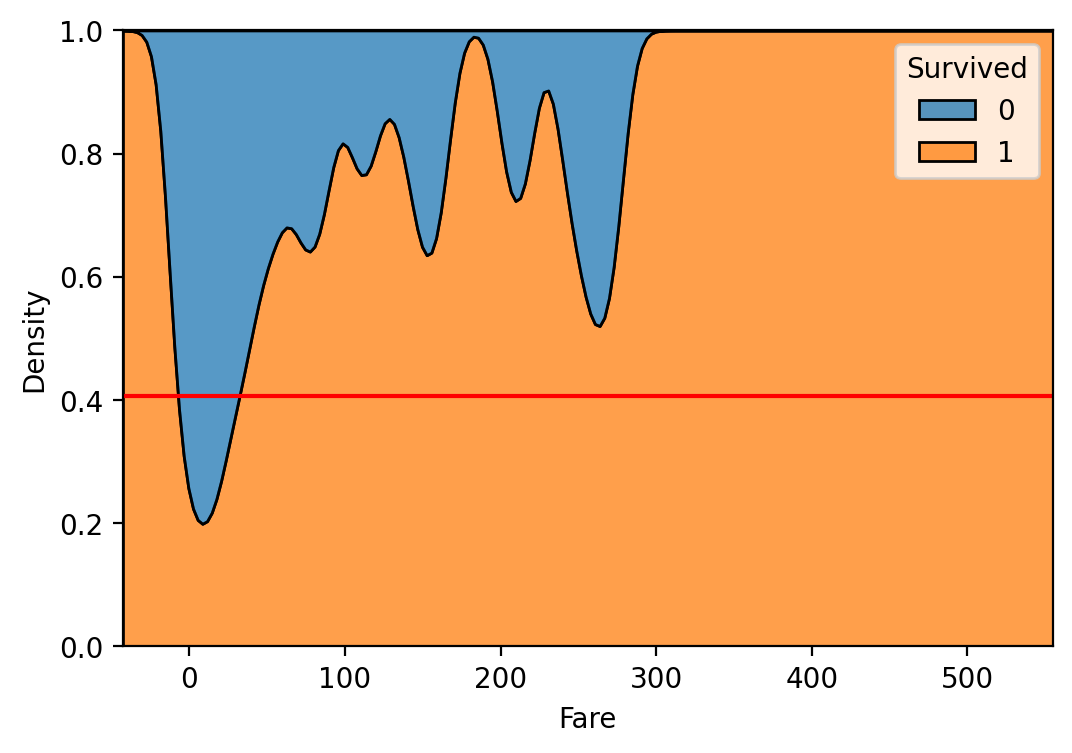

In [62]:
sns.kdeplot(x='Fare', hue='Survived', data=titanic, multiple='fill')
plt.axhline(titanic['Survived'].mean(), color='r')
plt.show()

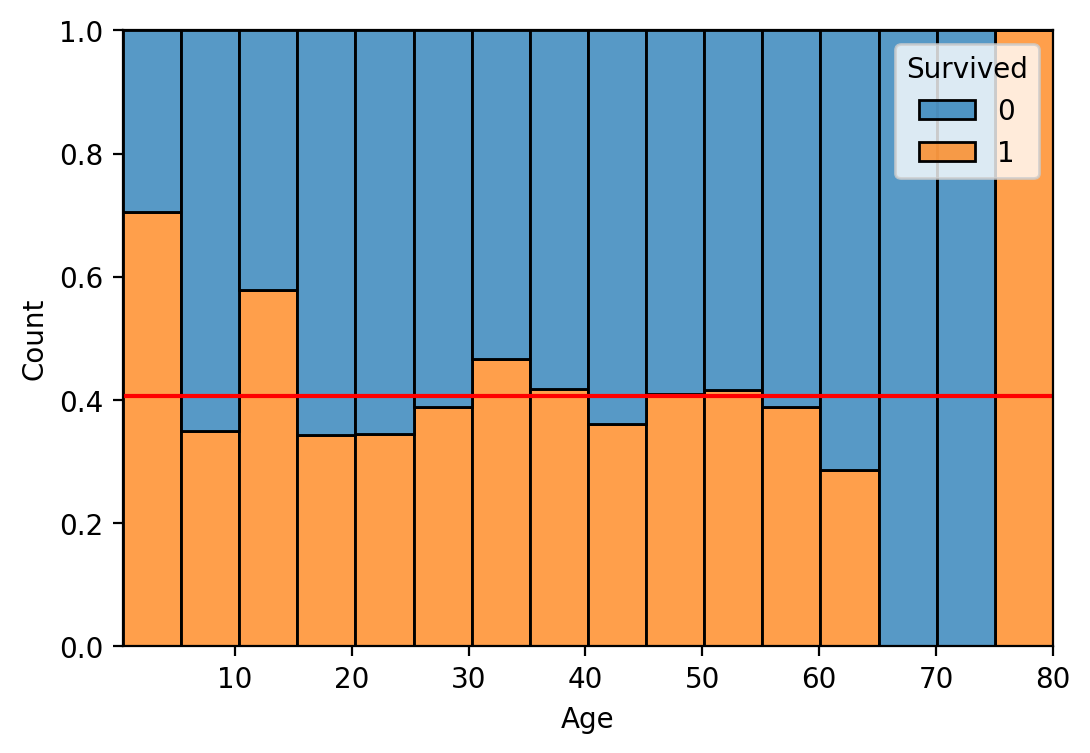

In [63]:
sns.histplot(x='Age', hue='Survived', data=titanic, bins=16, multiple='fill')
plt.axhline(titanic['Survived'].mean(), color='r')
plt.show()

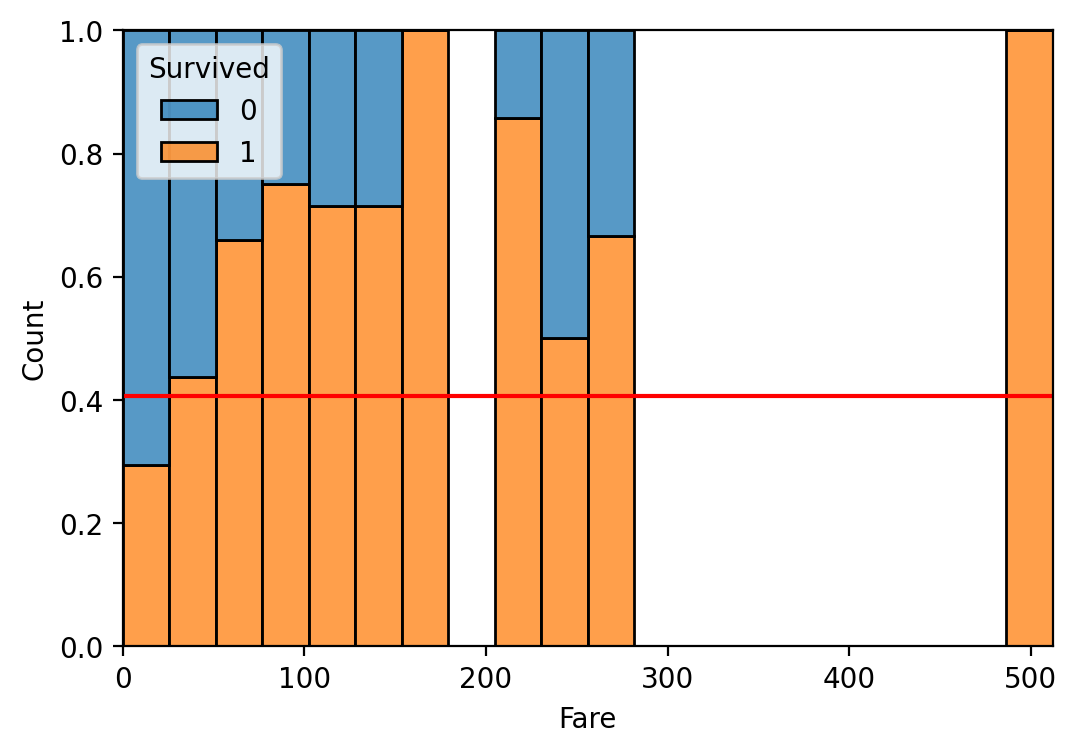

In [64]:
sns.histplot(x='Fare', hue='Survived', data=titanic, bins=20, multiple='fill')
plt.axhline(titanic['Survived'].mean(), color='r')
plt.show()

In [65]:
# 로지스틱 회귀 모델로부터 p-value를 구함
model = sm.Logit(titanic['Survived'], titanic['Age'])
result = model.fit()
print(result.pvalues)

Optimization terminated successfully.
         Current function value: 0.672504
         Iterations 4
Age    9.909841e-08
dtype: float64


In [66]:
model = sm.Logit(titanic['Survived'], titanic['Sex'].map({'male': 1, 'female': 0}))
result = model.fit()
print(result.pvalues)

Optimization terminated successfully.
         Current function value: 0.575464
         Iterations 5
Sex    2.704340e-31
dtype: float64


In [67]:
model = sm.Logit(titanic['Survived'], titanic['Parch'])
result = model.fit()
print(result.pvalues)

Optimization terminated successfully.
         Current function value: 0.693143
         Iterations 3
Parch    0.93757
dtype: float64


In [68]:
model = sm.Logit(titanic['Survived'], titanic['Fare'])
result = model.fit()
print(result.pvalues)

Optimization terminated successfully.
         Current function value: 0.685885
         Iterations 4
Fare    0.002606
dtype: float64


### 🔍 변수 유형에 따른 시각화 및 분석 방법

| x (feature) \ y (target) | 수치형 y               | 범주형 y                              |
|--------------------------|------------------------|----------------------------------------|
| **수치형 x**             | - 산점도 (Scatter Plot) <br> - 상관분석        | - Box Plot <br> - Histogram <br> - Density Plot <br> *(로지스틱 회귀)* |
| **범주형 x**             | - Bar Plot <br> - T-검정 <br> - 분산분석 (ANOVA) | - Bar Plot <br> - Mosaic Plot <br> - 카이제곱검정        |
